In [1]:
import numpy as np

# loading the dataset
import pandas as pd

# vitualization
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree
from sklearn.tree import DecisionTreeClassifier  

# RandomForest
from sklearn.ensemble import RandomForestClassifier

# SVM
from sklearn.svm import SVC

# Spilitting
from sklearn.model_selection import train_test_split

# metrics and evaluations
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix , classification_report , confusion_matrix
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import scipy.stats as stats
from collections import Counter

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
df = pd.DataFrame(data)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
data_test = pd.read_csv("mobile-price-classification/test.csv")
df_test = pd.DataFrame(data_test)
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


## Column Names

battery_power : Total energy a battery can store in one time measured in mAh


blue : Has bluetooth or not


clock_speed : speed at which microprocessor executes instructions


dual_sim : Has dual_sim supported or not


fc : front camera mega pixels


four_g : Has 4G or not


int_memory : Internal Memory in Gigabytes


m_depth : Mobile depth in cm


mobile_wt : Weight o mobile phone


n_cores : Number o cores of processor


pc : Primary camera megapixel


px_height : Pixel resolution Height


px_width : Pixel resolution width


ram : Random access memory n megabytes


sc_h : Screen height of mobile in cm


sc_w : Screen width of mobile in cm


talk_time : longest time that a single battery charge will last when you are


three_g : Has 3G or not


touch_screen : Has touch screen or not


wifi : Has wifi or not

# 1. PreProcessing

In [6]:
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
df_test.describe(include='all')

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [7]:
df["price_range"].unique()

array([1, 2, 3, 0], dtype=int64)

#### So, there are 4 types of price_range, 0, 1, 2 and 3.

#### Min of px_height  and sc_w are 0 which is unacceptable.

In [7]:
df_px = df[df["px_height"]==0]
df_px

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


In [8]:
df_px_test = df_test[df_test["px_height"]==0]
df_px_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
420,421,986,0,2.8,0,0,1,26,0.1,80,...,9,0,1214,1316,7,5,8,1,0,0
819,820,1992,1,1.3,1,8,1,43,1.0,153,...,15,0,883,2179,7,6,20,1,1,0


In [9]:
df = df.drop(index=[1481, 1933])

In [10]:
df_test = df_test.drop(index=[420, 819])

### sc_w Noises

#### The given dataset does'nt have many samples, so we can not delet all "sc_w" which are 0. Insted we are going to fill them with minimum amount of Screen width of mobiles which is 8 cm.

In [11]:
df["sc_w"] = df["sc_w"].replace(0, 8)
df["sc_w"] = df["sc_w"].replace(1, 8)
df["sc_w"] = df["sc_w"].replace(2, 8)
df["sc_w"] = df["sc_w"].replace(3, 8)
df["sc_w"] = df["sc_w"].replace(4, 8)
df["sc_w"] = df["sc_w"].replace(5, 8)
df["sc_w"] = df["sc_w"].replace(6, 8)
df["sc_w"] = df["sc_w"].replace(7, 8)

df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,...,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000
mean,1238.391391,0.494995,1.521722,0.510010,4.308809,0.521021,32.057558,0.501902,140.262763,4.519019,...,645.753754,1251.276276,2123.511512,12.308809,8.989990,11.010511,0.761261,0.502503,0.507508,1.499499
std,439.369721,0.500100,0.816240,0.500025,4.343101,0.499683,18.141468,0.288411,35.404007,2.287627,...,443.532906,432.064000,1084.701280,4.213652,2.067683,5.464813,0.426419,0.500119,0.500069,1.118314
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,1.000000,500.000000,256.000000,5.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.250000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,284.000000,874.250000,1206.500000,9.000000,8.000000,6.000000,1.000000,0.000000,0.000000,0.250000
50%,1226.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,565.500000,1247.000000,2146.500000,12.000000,8.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.750000,1632.750000,3063.750000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [12]:
df_test["sc_w"] = df_test["sc_w"].replace(0, 8)
df_test["sc_w"] = df_test["sc_w"].replace(1, 8)
df_test["sc_w"] = df_test["sc_w"].replace(2, 8)
df_test["sc_w"] = df_test["sc_w"].replace(3, 8)
df_test["sc_w"] = df_test["sc_w"].replace(4, 8)
df_test["sc_w"] = df_test["sc_w"].replace(5, 8)
df_test["sc_w"] = df_test["sc_w"].replace(6, 8)
df_test["sc_w"] = df_test["sc_w"].replace(7, 8)

df_test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,...,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,500.259519,1248.028056,0.516032,1.539880,0.517034,4.594188,0.485972,33.650301,0.517435,139.557114,...,10.050100,628.377756,1240.157315,2139.782565,12.005010,8.840681,11.079158,0.755511,0.500000,0.508016
std,288.920781,432.170674,0.499993,0.829105,0.499960,4.464127,0.500054,18.142834,0.280415,34.832890,...,6.099106,432.450690,439.965762,1088.870164,4.319136,1.944998,5.495028,0.429999,0.500251,0.500186
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,...,0.000000,2.000000,501.000000,263.000000,5.000000,8.000000,2.000000,0.000000,0.000000,0.000000
25%,250.250000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,110.000000,...,5.000000,265.750000,831.250000,1235.750000,8.000000,8.000000,6.250000,1.000000,0.000000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.000000,...,10.000000,565.000000,1251.500000,2153.500000,12.000000,8.000000,11.000000,1.000000,0.500000,1.000000
75%,749.750000,1629.000000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.000000,...,16.000000,905.000000,1639.250000,3066.500000,16.000000,8.000000,16.000000,1.000000,1.000000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


In [13]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,8,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,8,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,8,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,8,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,8,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,8,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [14]:
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,8,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,8,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,8,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,8,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,8,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [15]:
finall_df = df.append(df_test)
finall_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,8,19,0,0,1,1.0,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,8,7,1,1,0,2.0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,8,9,1,1,0,2.0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,8,15,1,1,0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,913,2121,14,8,15,1,1,0,NaN,996.0
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1632,1933,8,8,19,0,1,1,NaN,997.0
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,825,1223,5,8,14,1,0,0,NaN,998.0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,832,2509,15,11,6,0,1,0,NaN,999.0


# 

### Let's check missing values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 1998 entries, 0 to 1999

Data columns (total 21 columns):

 #   Column         Non-Null Count  Dtype  

---  ------         --------------  -----  

 0   battery_power  1998 non-null   int64  

 1   blue           1998 non-null   int64  

 2   clock_speed    1998 non-null   float64

 3   dual_sim       1998 non-null   int64  

 4   fc             1998 non-null   int64  

 5   four_g         1998 non-null   int64  

 6   int_memory     1998 non-null   int64  

 7   m_dep          1998 non-null   float64

 8   mobile_wt      1998 non-null   int64  

 9   n_cores        1998 non-null   int64  

 10  pc             1998 non-null   int64  

 11  px_height      1998 non-null   int64  

 12  px_width       1998 non-null   int64  

 13  ram            1998 non-null   int64  

 14  sc_h           1998 non-null   int64  

 15  sc_w           1998 non-null   int64  

 16  talk_time      1998 non-null   int64  

 17  three_g        1998 non-null  

In [17]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [18]:
df_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

#### As we can see there is no missing values in this dataset.

In [33]:
df.duplicated().sum()

0

In [34]:
df_test.duplicated().sum()

0

# 

## Cheching the distributions of train and test data

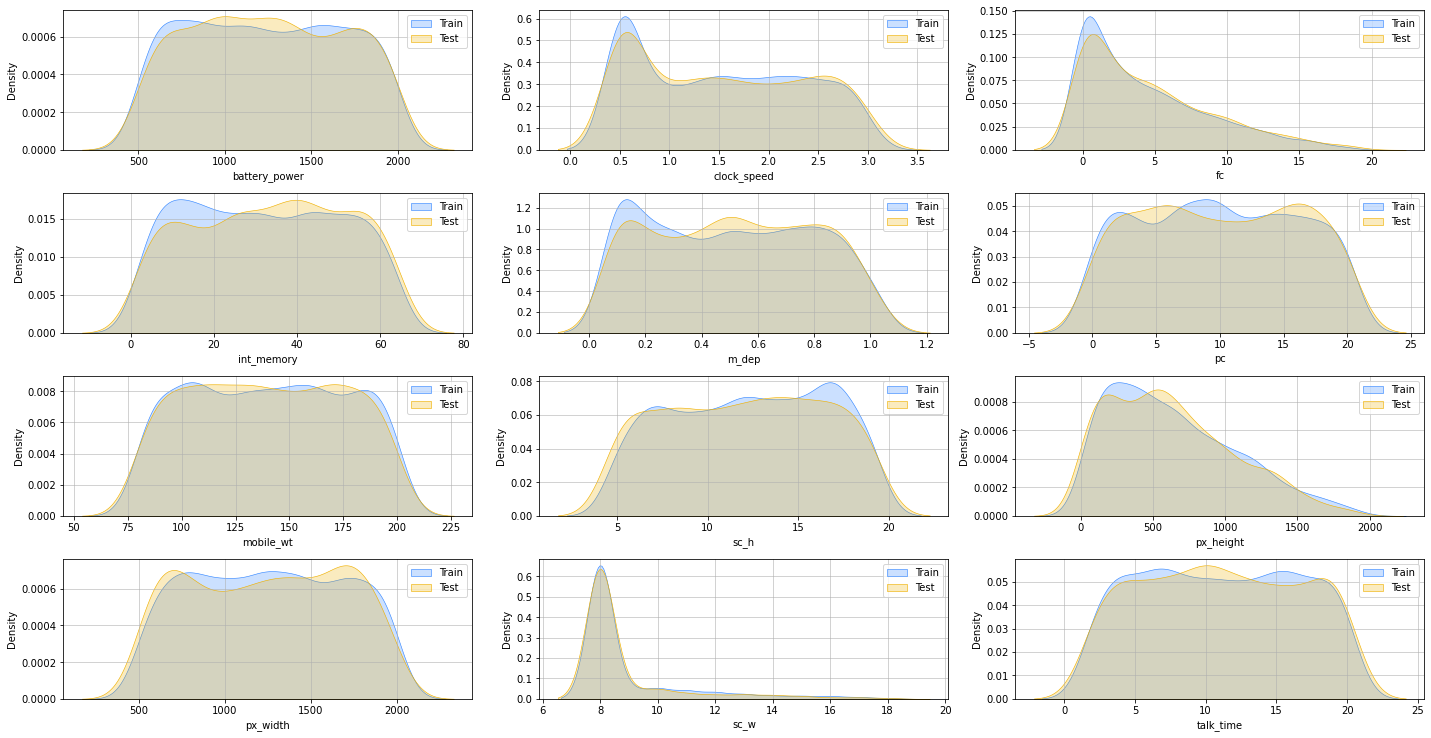

In [26]:
names = ['battery_power', 'clock_speed','fc','int_memory','m_dep','pc','mobile_wt','sc_h','px_height','px_width','sc_w','talk_time']

fig = plt.figure(figsize=(20, 15))
rows, cols = 6, 3
for idx, num in enumerate(names):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = df, label = "Train")
    sns.kdeplot(x = num, fill = True,color ="#EFB000",linewidth=0.6, data = df_test, label = "Test")      
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

### Distributions of columns are quiet the same as each other so we don't have problems with them.

# 

# 

### Now let's see if there is any Noises or Outliers on the dataset

Text(0.5, 1.0, 'battery_power VS price_range')

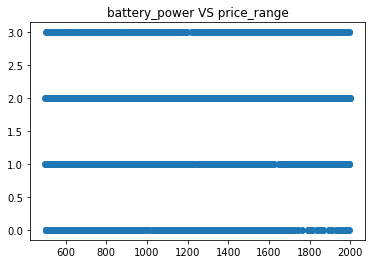

In [20]:
plt.scatter(df["battery_power"], df["price_range"])
plt.title("battery_power VS price_range")

Text(0.5, 1.0, 'blue VS price_range')

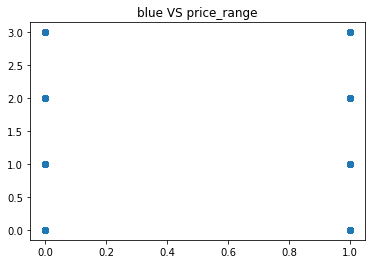

In [21]:
plt.scatter(df["blue"], df["price_range"])
plt.title("blue VS price_range")

Text(0.5, 1.0, 'clock_speed VS price_range')

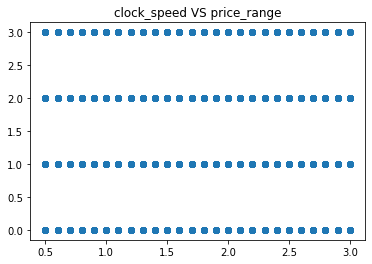

In [54]:
plt.scatter(df["clock_speed"], df["price_range"])
plt.title("clock_speed VS price_range")

Text(0.5, 1.0, 'dual_sim VS price_range')

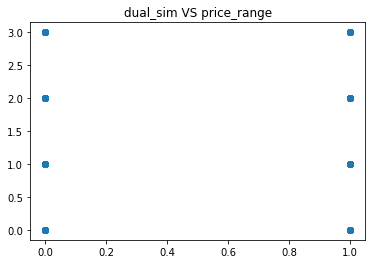

In [55]:
plt.scatter(df["dual_sim"], df["price_range"])
plt.title("dual_sim VS price_range")

Text(0.5, 1.0, 'fc VS price_range')

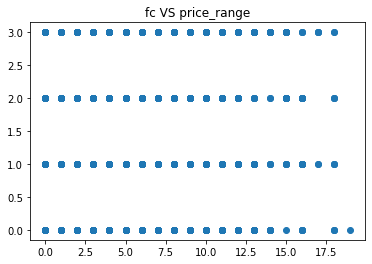

In [56]:
plt.scatter(df["fc"], df["price_range"])
plt.title("fc VS price_range")

Text(0.5, 1.0, 'four_g VS price_range')

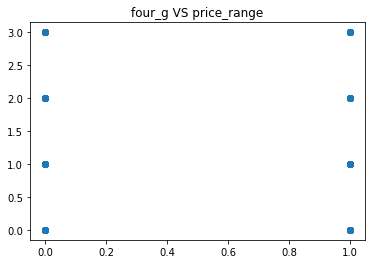

In [57]:
plt.scatter(df["four_g"], df["price_range"])
plt.title("four_g VS price_range")

Text(0.5, 1.0, 'int_memory VS price_range')

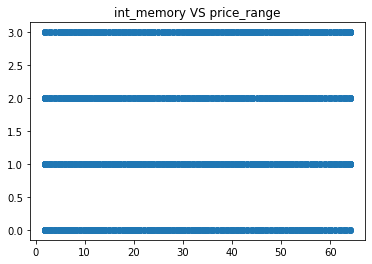

In [58]:
plt.scatter(df["int_memory"], df["price_range"])
plt.title("int_memory VS price_range")

Text(0.5, 1.0, 'm_dep VS price_range')

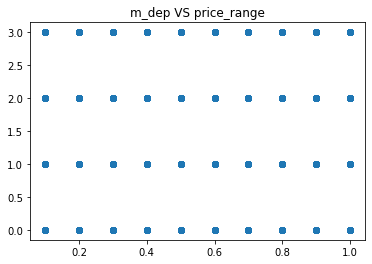

In [59]:
plt.scatter(df["m_dep"], df["price_range"])
plt.title("m_dep VS price_range")

Text(0.5, 1.0, 'mobile_wt VS price_range')

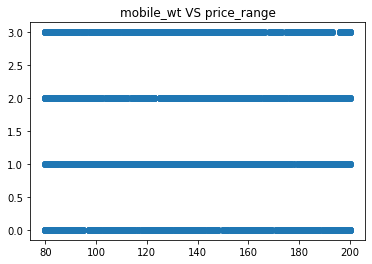

In [60]:
plt.scatter(df["mobile_wt"], df["price_range"])
plt.title("mobile_wt VS price_range")

Text(0.5, 1.0, 'n_cores VS price_range')

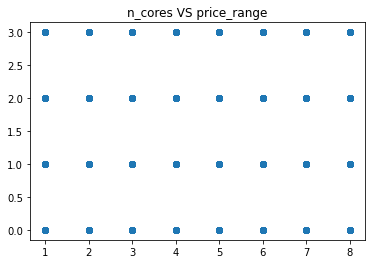

In [61]:
plt.scatter(df["n_cores"], df["price_range"])
plt.title("n_cores VS price_range")

Text(0.5, 1.0, 'pc VS price_range')

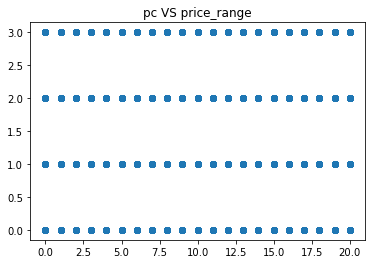

In [62]:
plt.scatter(df["pc"], df["price_range"])
plt.title("pc VS price_range")

Text(0.5, 1.0, 'px_height VS price_range')

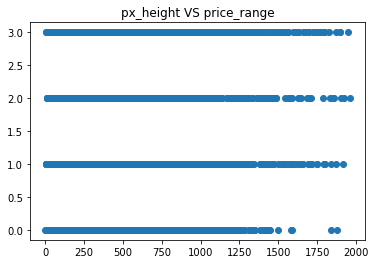

In [63]:
plt.scatter(df["px_height"], df["price_range"])
plt.title("px_height VS price_range")

Text(0.5, 1.0, 'px_width VS price_range')

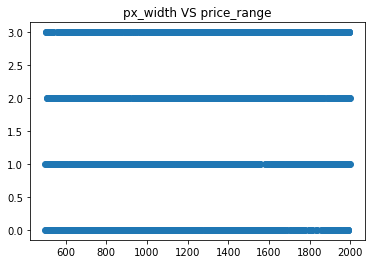

In [64]:
plt.scatter(df["px_width"], df["price_range"])
plt.title("px_width VS price_range")

Text(0.5, 1.0, 'ram VS price_range')

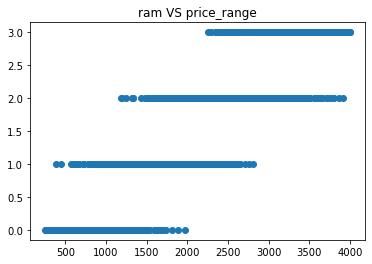

In [65]:
plt.scatter(df["ram"], df["price_range"])
plt.title("ram VS price_range")

Text(0.5, 1.0, 'sc_h VS price_range')

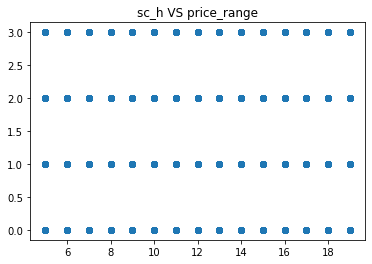

In [66]:
plt.scatter(df["sc_h"], df["price_range"])
plt.title("sc_h VS price_range")

Text(0.5, 1.0, 'sc_w VS price_range')

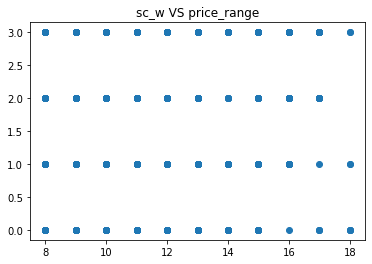

In [67]:
plt.scatter(df["sc_w"], df["price_range"])
plt.title("sc_w VS price_range")

Text(0.5, 1.0, 'talk_time VS price_range')

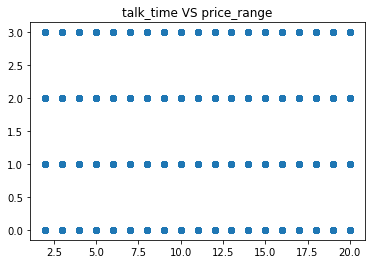

In [68]:
plt.scatter(df["talk_time"], df["price_range"])
plt.title("talk_time VS price_range")

Text(0.5, 1.0, 'three_g VS price_range')

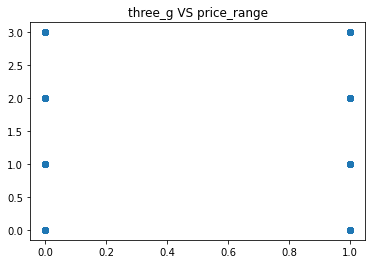

In [69]:
plt.scatter(df["three_g"], df["price_range"])
plt.title("three_g VS price_range")

Text(0.5, 1.0, 'touch_screen VS price_range')

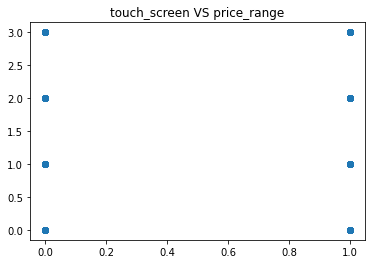

In [70]:
plt.scatter(df["touch_screen"], df["price_range"])
plt.title("touch_screen VS price_range")

Text(0.5, 1.0, 'wifi VS price_range')

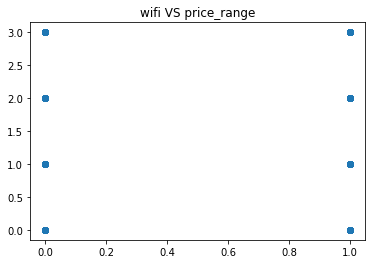

In [71]:
plt.scatter(df["wifi"], df["price_range"])
plt.title("wifi VS price_range")

# 

# 

## Outlier detection using Interquartile Range

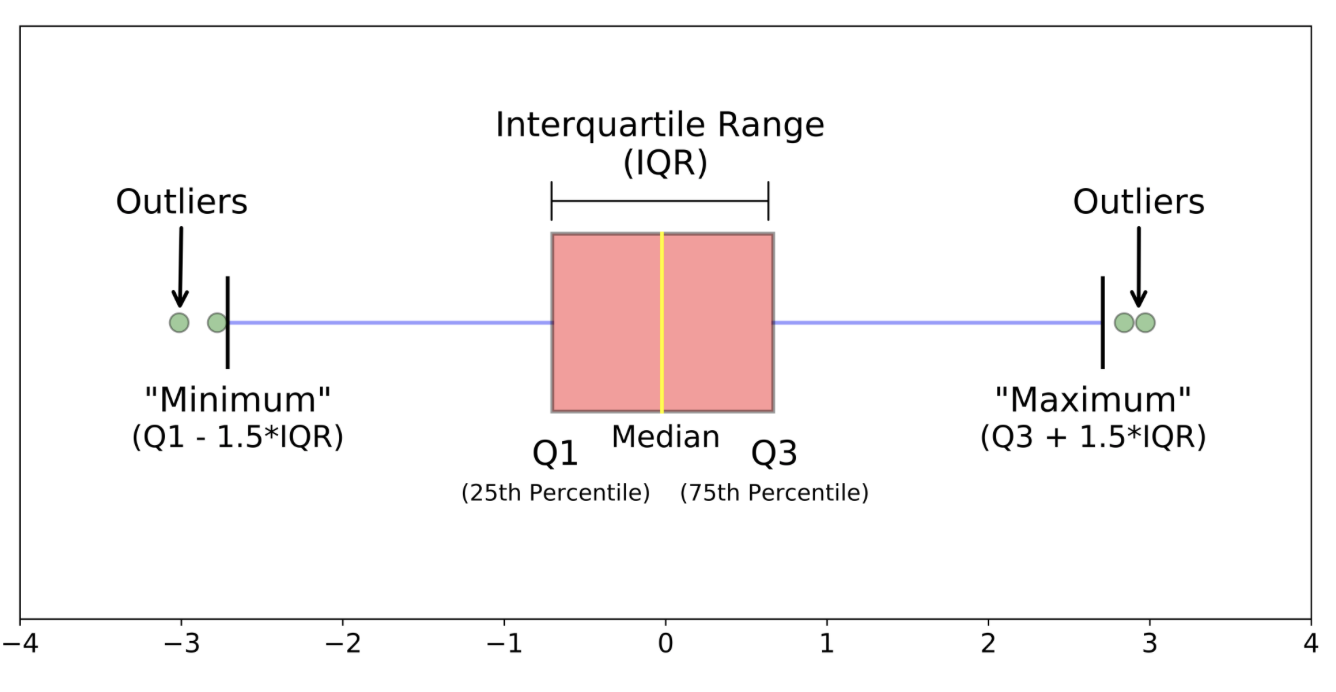

In [19]:
features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']

In [20]:
outlier_list = []
    
for column in features:
                
    # 1st quartile (25%)
    Q1 = np.percentile(df[column], 25)
    # 3rd quartile (75%)
    Q3 = np.percentile(df[column],75)
        
    # Interquartile range (IQR)
    IQR = Q3 - Q1
        
    # outlier step
    outlier_step = 1.5 * IQR
        
    # Determining a list of indices of outliers
    outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
    # appending the list of outliers 
    outlier_list.extend(outlier_list_column)

In [22]:
outlier_list = set(outlier_list)
print("Number of Outlies is : ", len(outlier_list),"\n\n")
print("Outlier indexes are : ", outlier_list)

Number of Outlies is :  749 





Outlier indexes are :  {0, 10, 15, 18, 19, 20, 22, 30, 39, 43, 45, 47, 49, 51, 54, 56, 58, 59, 67, 70, 74, 77, 78, 79, 81, 82, 85, 86, 94, 95, 97, 98, 102, 106, 108, 109, 111, 118, 120, 121, 122, 125, 134, 135, 137, 139, 142, 143, 145, 146, 148, 151, 154, 158, 159, 163, 165, 169, 174, 176, 178, 179, 181, 182, 184, 193, 204, 207, 208, 209, 212, 219, 220, 222, 224, 226, 227, 228, 229, 230, 231, 236, 246, 247, 250, 251, 254, 263, 269, 270, 271, 274, 275, 279, 280, 286, 289, 290, 291, 292, 294, 296, 298, 300, 301, 303, 305, 307, 308, 310, 311, 314, 318, 322, 325, 326, 327, 328, 329, 330, 334, 335, 337, 339, 343, 344, 349, 350, 351, 352, 353, 356, 360, 362, 363, 364, 369, 370, 372, 373, 375, 376, 378, 379, 380, 385, 387, 390, 391, 392, 393, 402, 406, 412, 413, 416, 418, 421, 423, 424, 430, 431, 437, 439, 440, 442, 443, 445, 449, 450, 456, 458, 462, 463, 464, 469, 470, 471, 474, 477, 478, 479, 482, 486, 488, 493, 496, 500, 503, 505, 506, 507, 508, 511, 515, 

# 

# 

## Outlier detection using Standard Deviation

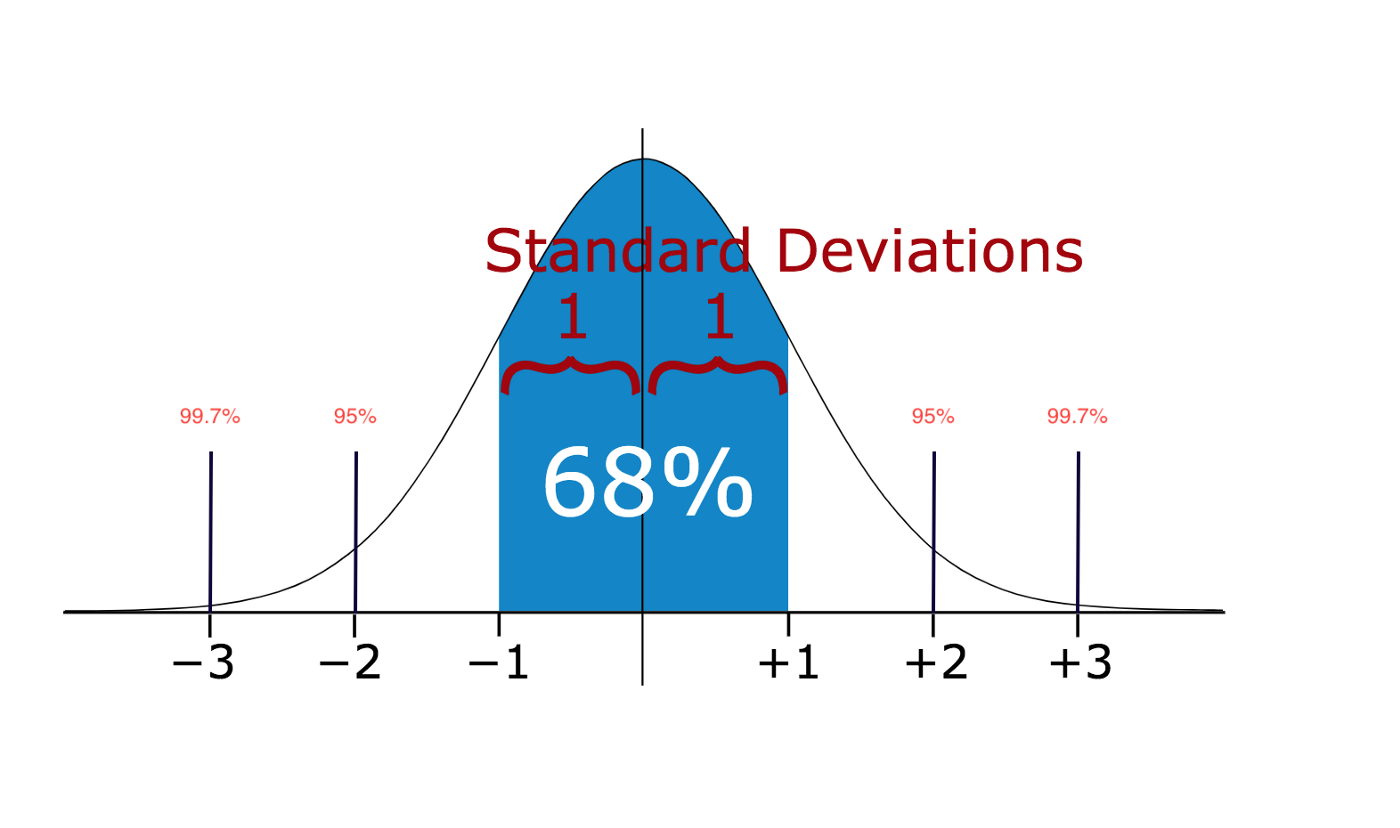

In [23]:
outlier_indices = []
    
for column in features:
    # calculate the mean and standard deviation of the data frame
    data_mean = df[column].mean()
    data_std = df[column].std()
        
    # calculate the cutoff value
    cut_off = data_std * 3
        
    # Determining a list of indices of outliers for feature column        
    outlier_list_column = df[(df[column] < data_mean - cut_off) | (df[column] > data_mean + cut_off)].index
        
    # appending the found outlier indices for column to the list of outlier indices 
    outlier_indices.extend(outlier_list_column)

In [24]:
outlier_indices = set(outlier_indices)
print("Number of Outlies is : ", len(outlier_indices), "\n\n")
print("Outlier indexes are : ", outlier_indices)

Number of Outlies is :  68 





Outlier indexes are :  {387, 1285, 1542, 903, 1416, 393, 1032, 1803, 1420, 1929, 142, 527, 1423, 1553, 1554, 1807, 1812, 1686, 280, 1561, 1688, 1693, 1060, 165, 1705, 1962, 430, 1583, 305, 1201, 1972, 1082, 1340, 703, 1606, 842, 1611, 1994, 209, 1366, 599, 1880, 1241, 1882, 220, 604, 94, 95, 1888, 97, 226, 351, 228, 353, 1254, 631, 1632, 1387, 108, 1645, 1262, 1771, 369, 1525, 375, 1657, 508, 1406}


### It seems like we have so many outliers!!

# 

# 

#  2. Visualization

## Let's see if the data is balanced or not

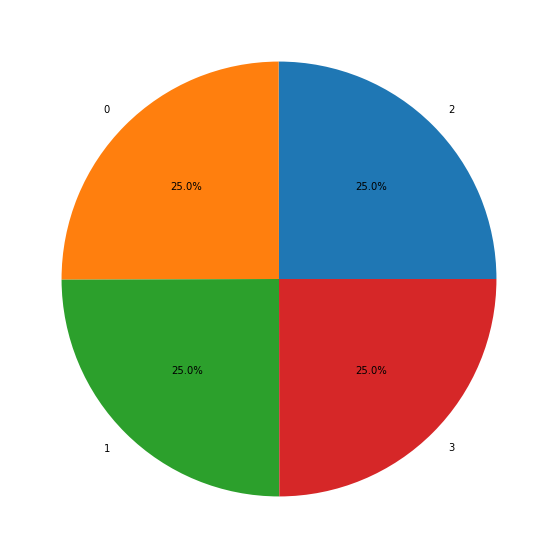

In [28]:
s = df["price_range"].value_counts()

plt.figure(figsize=(10,10))
plt.pie(s, labels = s.index, autopct='%1.1f%%')
plt.show()

### The given data is totaly balaned.

# 

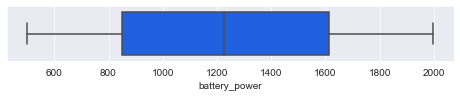

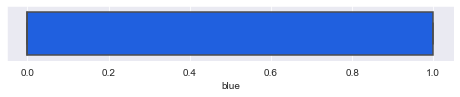

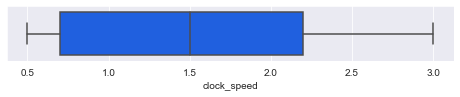

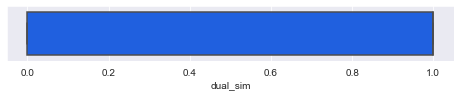

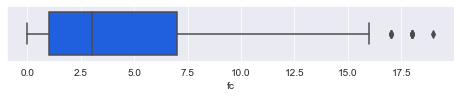

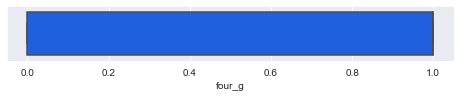

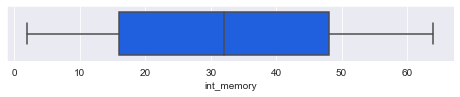

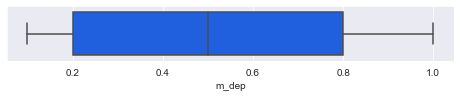

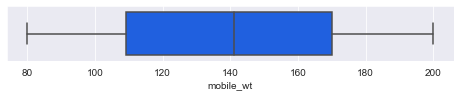

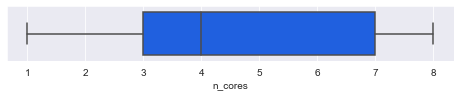

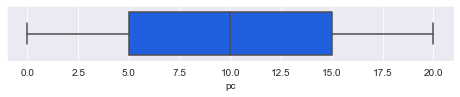

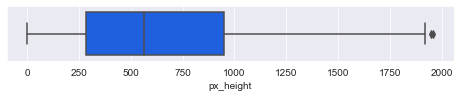

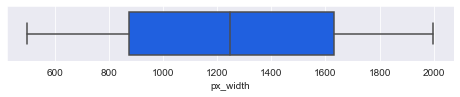

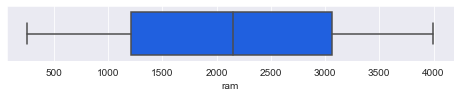

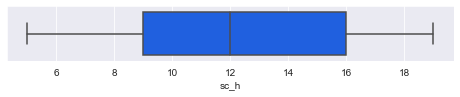

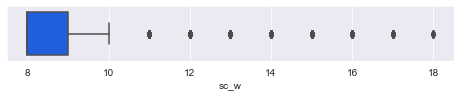

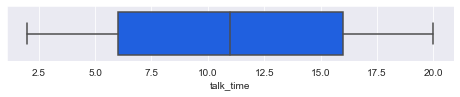

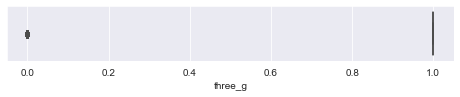

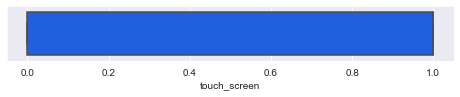

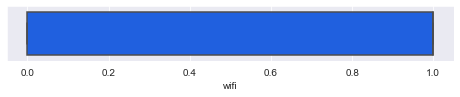

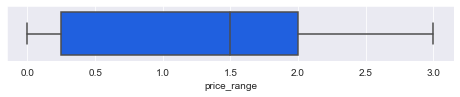

In [61]:
names = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']

i = 0
while i<21 :
    fig = plt.figure(figsize=(8,1))
    sns.boxplot(x=names[i], data=df)
    i += 1

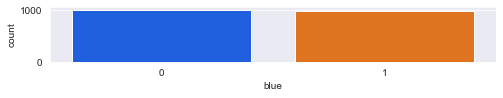

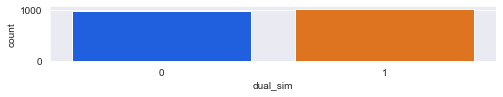

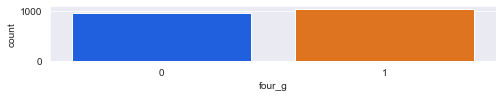

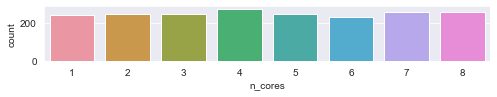

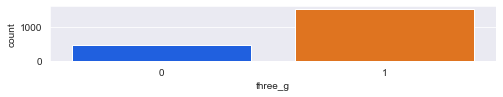

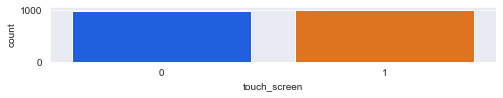

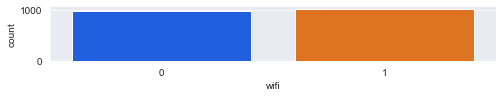

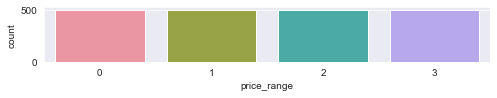

In [67]:
categorical = ['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi','price_range']

i = 0
while i<8 :
    fig = plt.figure(figsize=(8,1))
    sns.countplot(x=categorical[i], data=df)
    i += 1

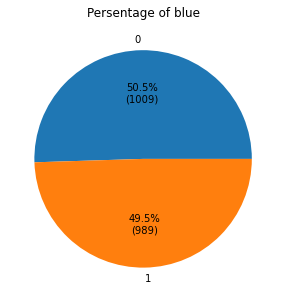

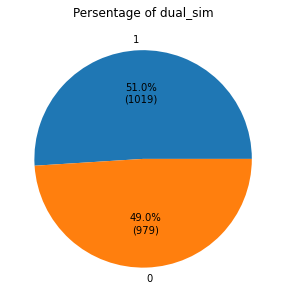

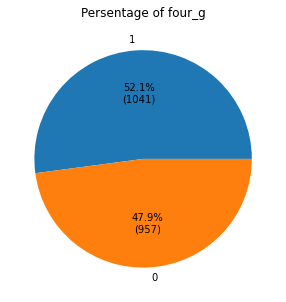

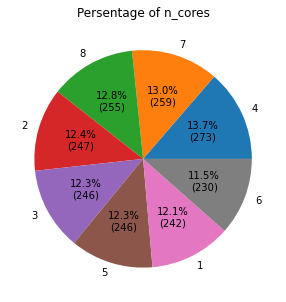

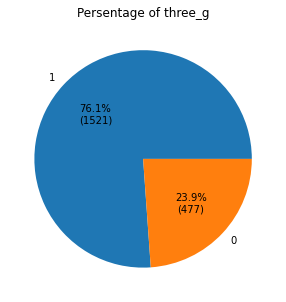

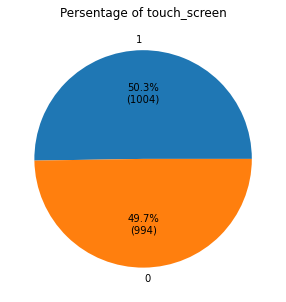

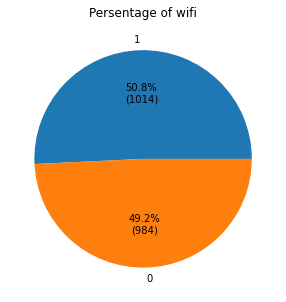

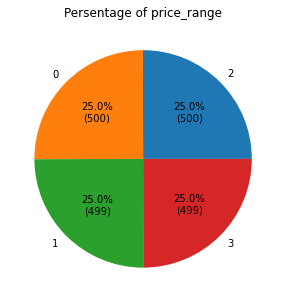

In [82]:
names = ['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi','price_range']


for i in names :
    df_i = pd.DataFrame(df, columns=[i])
    plt.figure(figsize=(5,5))
    s = df_i[i].value_counts()
    plt.pie(s,labels = s.index, autopct=autopct_format(s))
    plt.title(f'Persentage of {i}')
    plt.show()

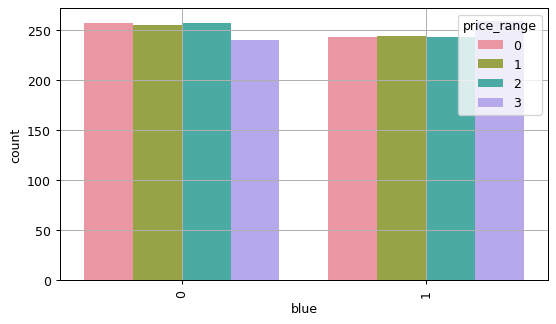

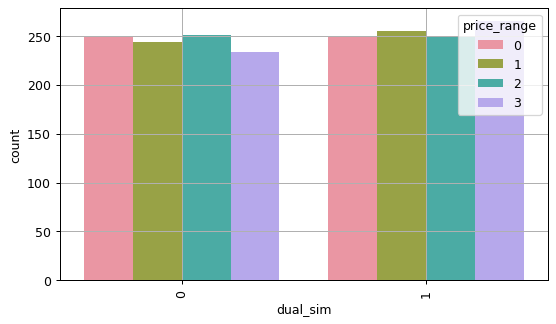

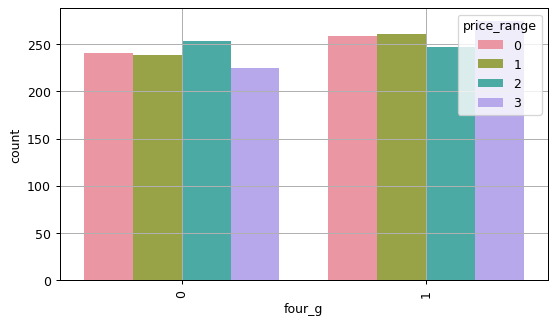

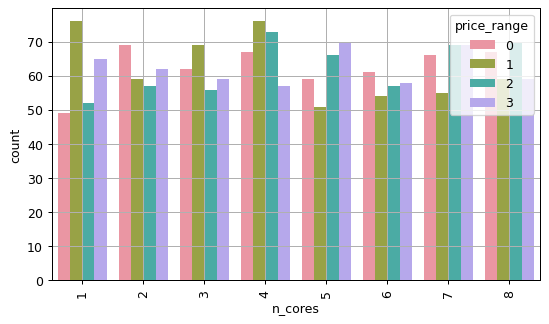

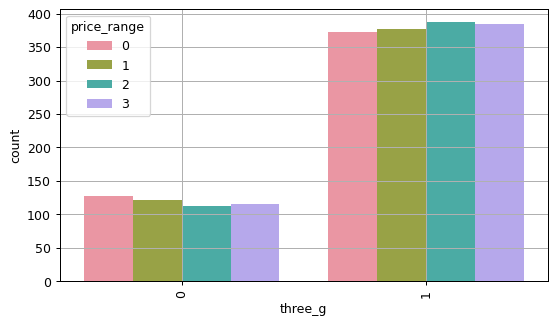

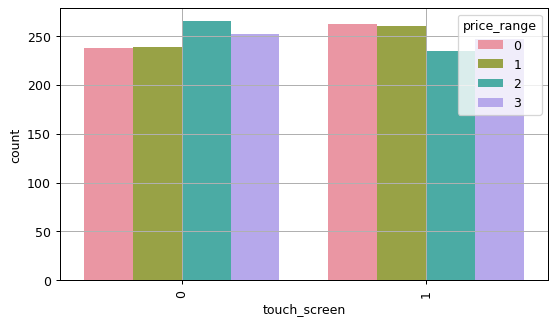

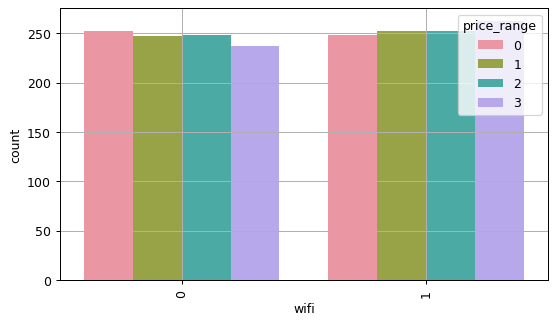

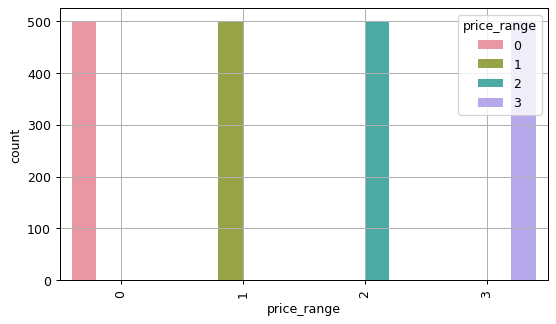

In [94]:
names = ['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi','price_range']


for i in names :
    plt.figure(figsize=(7,4), dpi=90)
    sns.countplot(x=i, data=df, hue= "price_range")
    plt.xticks(rotation=90)
    plt.grid()

# 

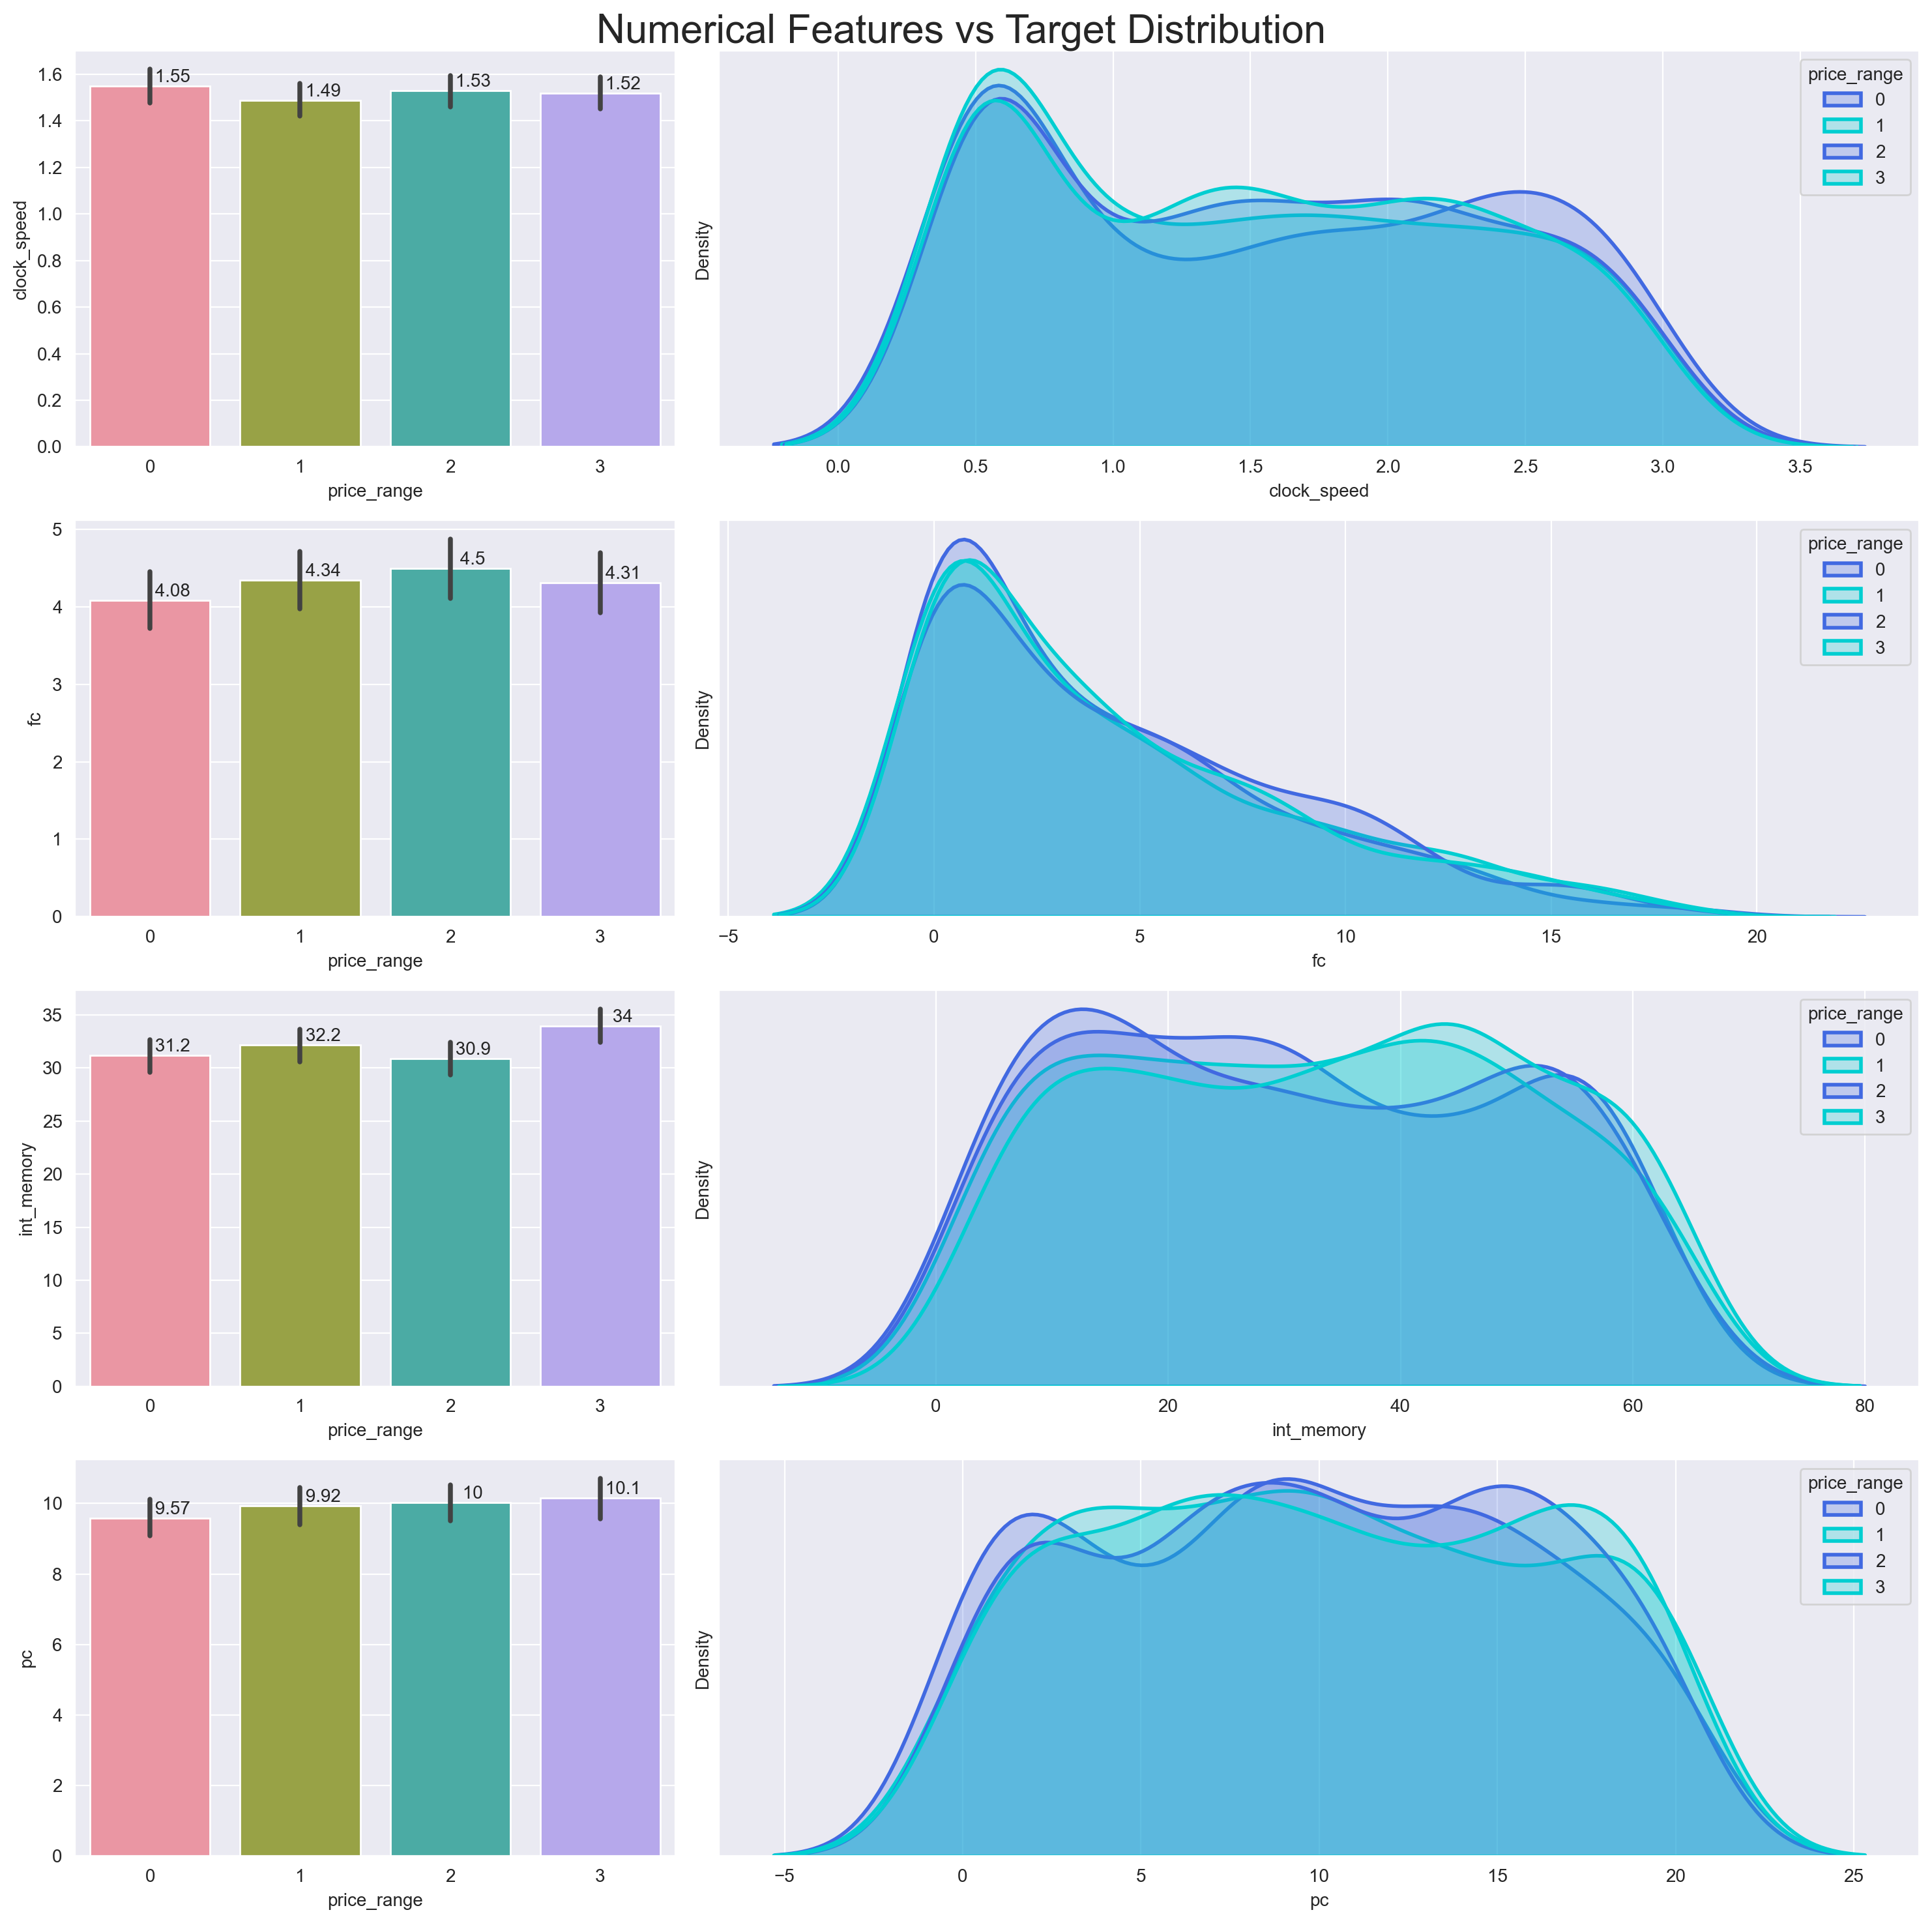

In [62]:
names = ['clock_speed','fc','int_memory','pc']

sns.set_palette(['royalblue', 'darkturquoise'])

fig, ax = plt.subplots(4, 2, figsize=(15,15), dpi=200, gridspec_kw={'width_ratios': [1, 2]})

for i,col in enumerate(names):
    # barplot
    graph = sns.barplot(data=df, x="price_range", y=col, ax=ax[i,0])
    # kde Plot
    sns.kdeplot(data=df[df["price_range"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df["price_range"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    sns.kdeplot(data=df[df["price_range"]==2], x=col, fill=True, linewidth=2, ax=ax[i,1], label='2')
    sns.kdeplot(data=df[df["price_range"]==3], x=col, fill=True, linewidth=2, ax=ax[i,1], label='3')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='price_range', loc='upper right')
    # Add bar sizes to our plot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
plt.suptitle('Numerical Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

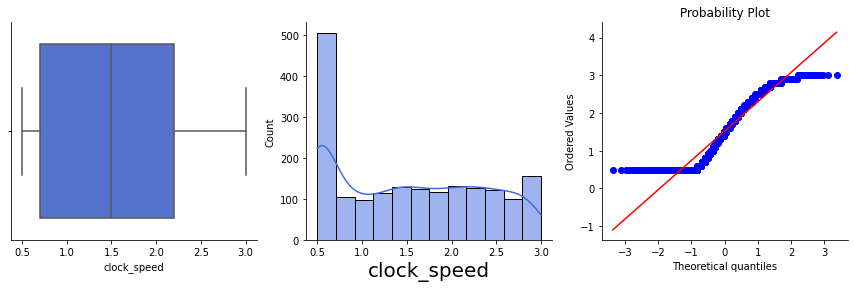

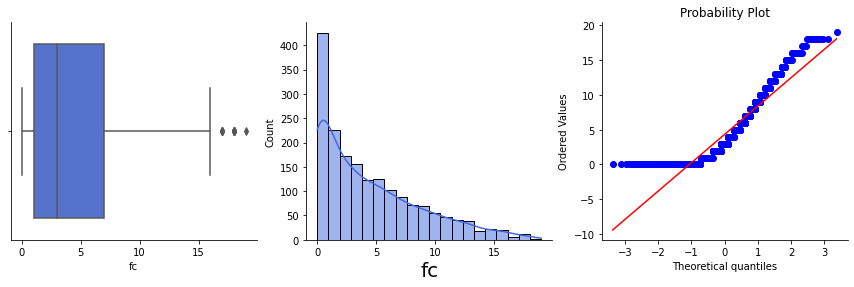

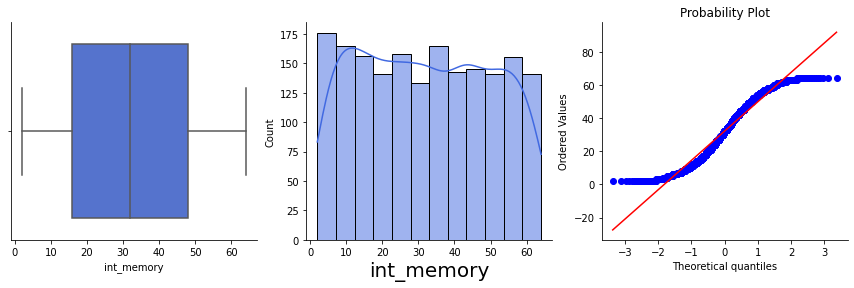

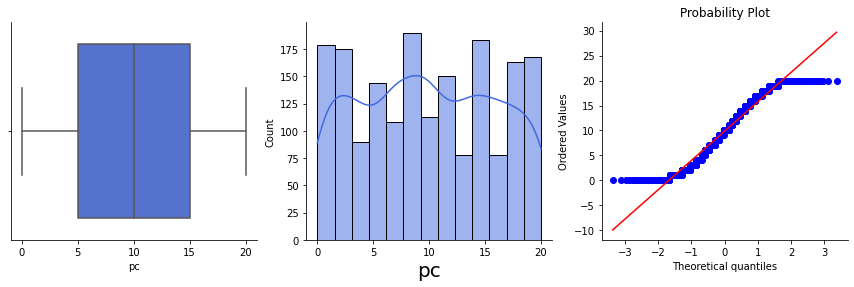

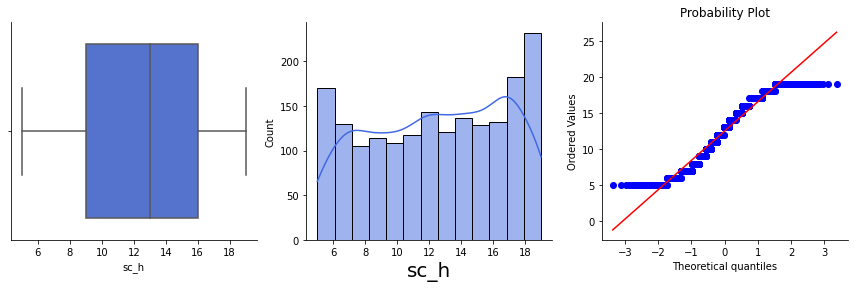

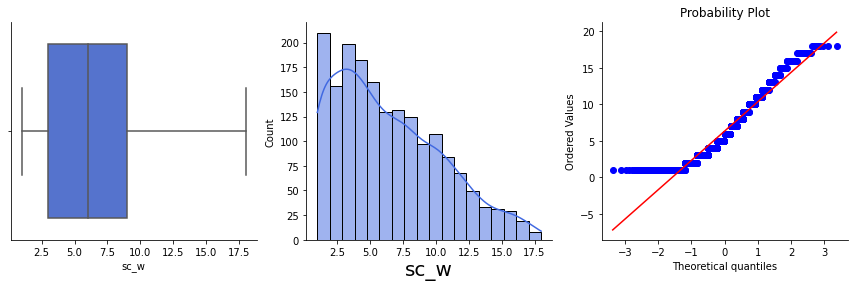

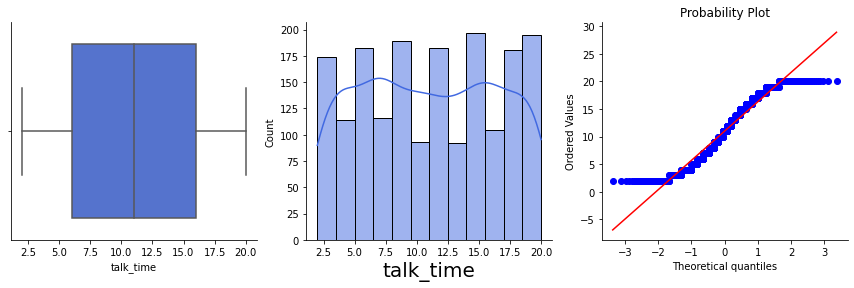

In [45]:
names = ['clock_speed','fc','int_memory','pc','sc_h','sc_w','talk_time']

i = 0
while i < len(names):
    fig = plt.figure(figsize=[15 , 4])
    plt.subplot(1 , 3 , 1)
    sns . boxplot(x =names[i] , data =df)
    sns.despine(top=True,right=True) 
    if i == len(names):
        break;
        
    plt.subplot(1 , 3 , 2)
    sns.histplot(df[names[i]], kde=True )
    sns.despine(top=True,right=True) 
    plt.xlabel(names[i] , size= 20)
    
    plt.subplot(1 , 3 , 3)
    stats.probplot(df[names[i]], dist ="norm", plot = plt)
    sns.despine(top=True,right=True) 
    i += 1
    plt.show()



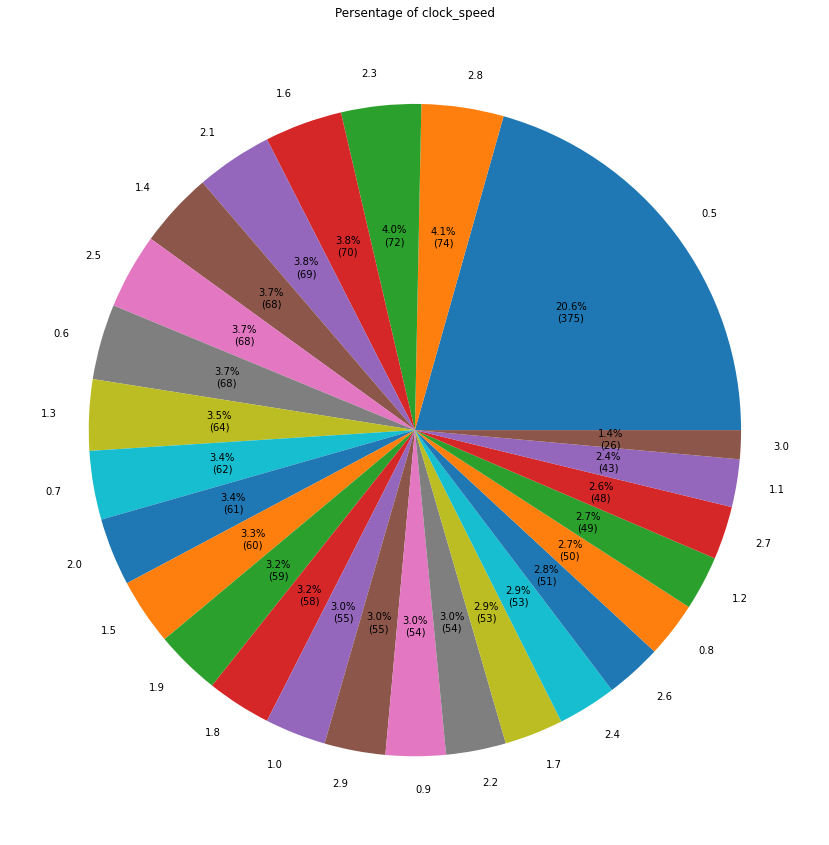

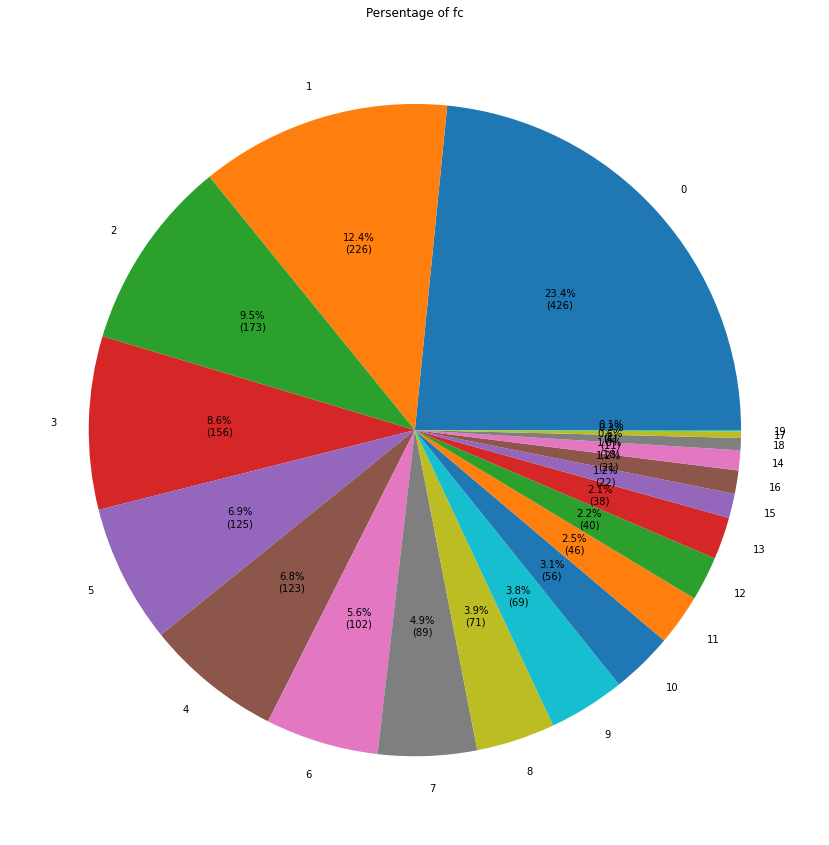

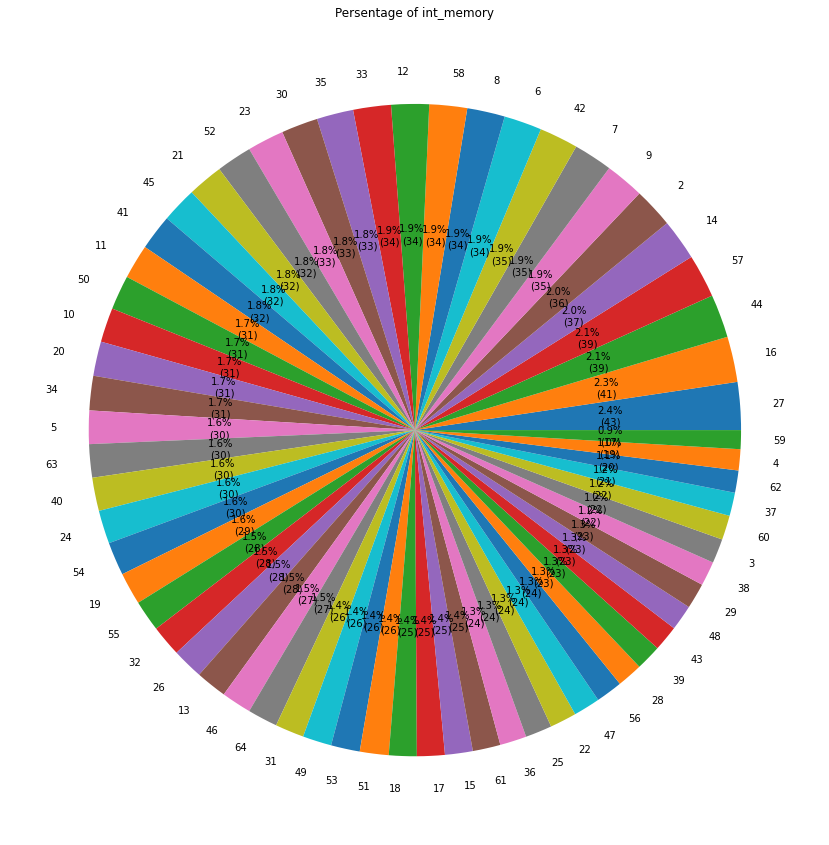

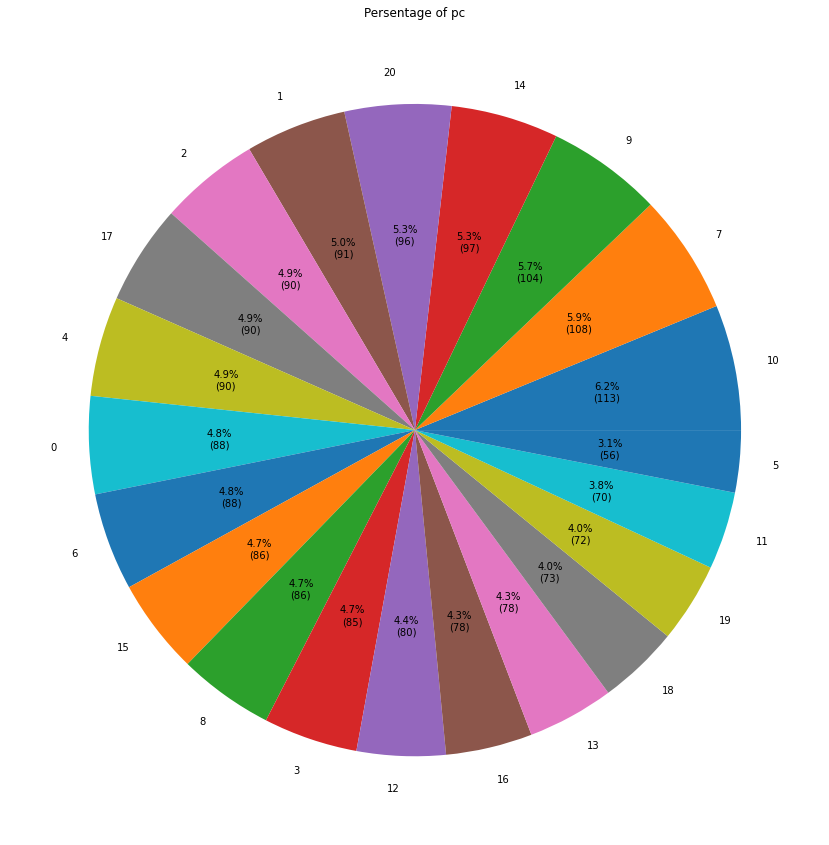

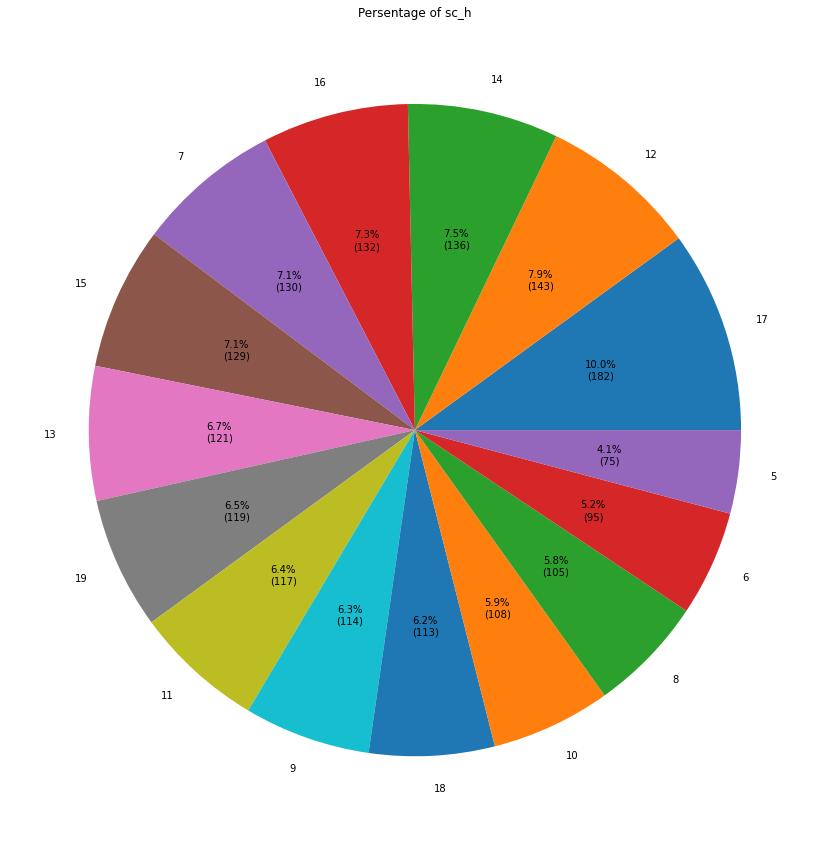

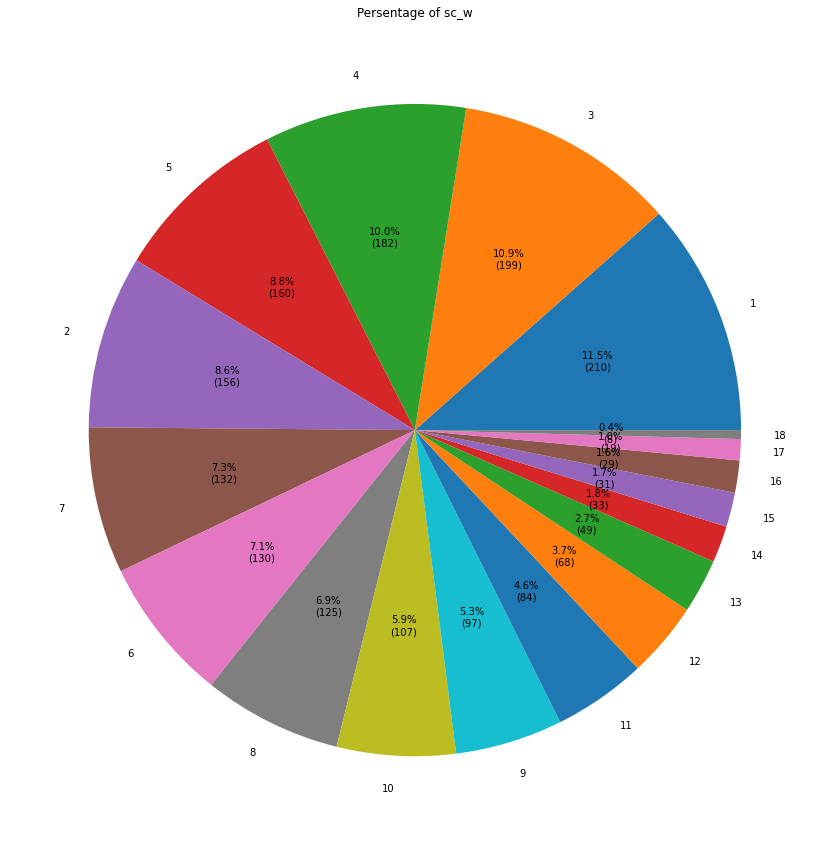

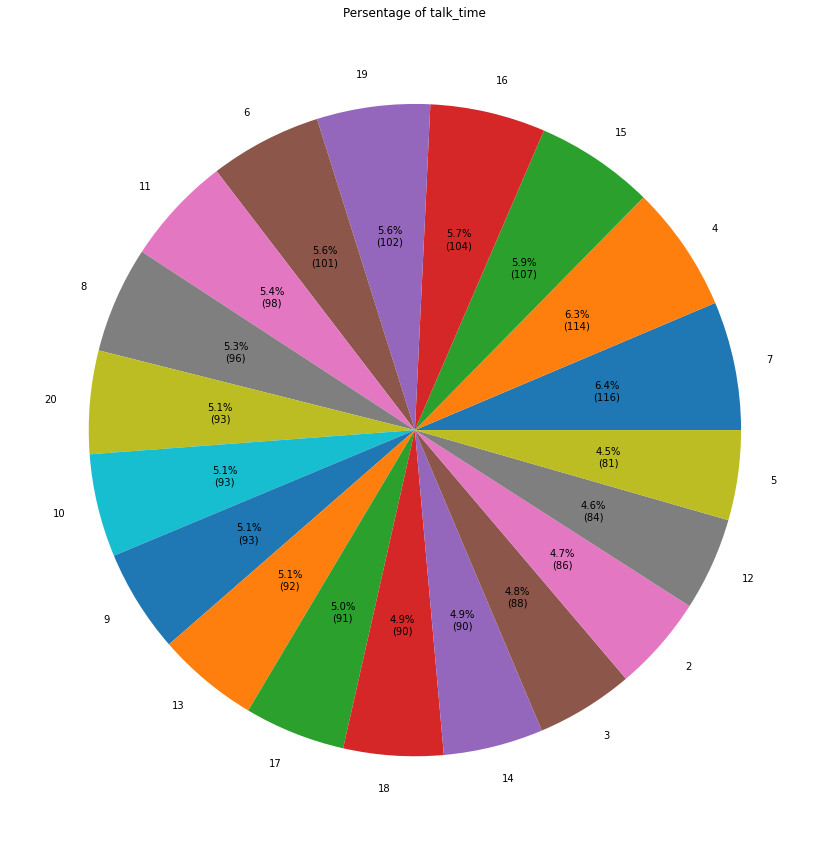

In [241]:
names = ['clock_speed','fc','int_memory','pc','sc_h','sc_w','talk_time']



for i in names :
    df_i = pd.DataFrame(df, columns=[i])
    plt.figure(figsize=(15,15))
    s = df_i[i].value_counts()
    plt.pie(s,labels = s.index, autopct=autopct_format(s))
    plt.title(f'Persentage of {i}')
    plt.show()

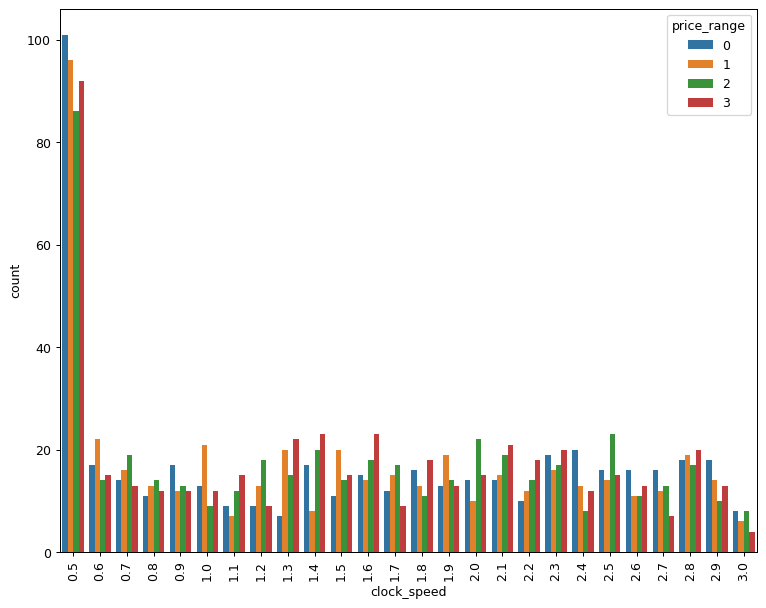

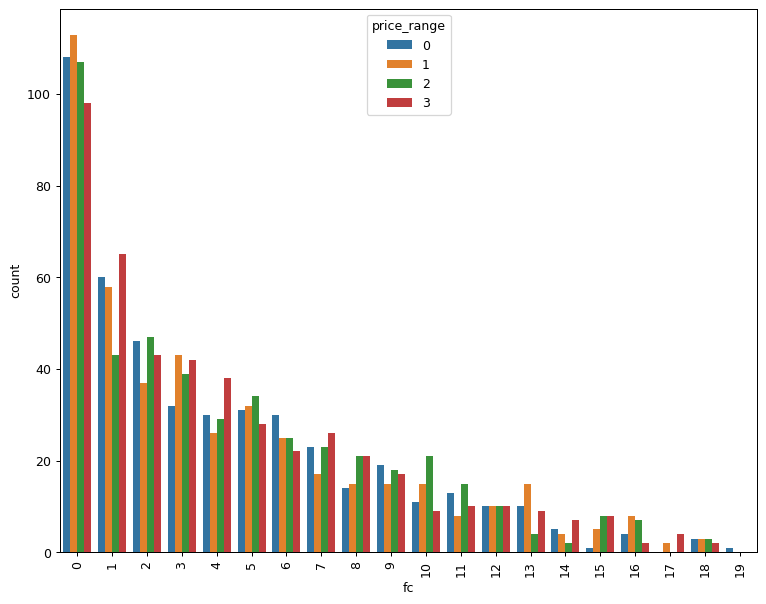

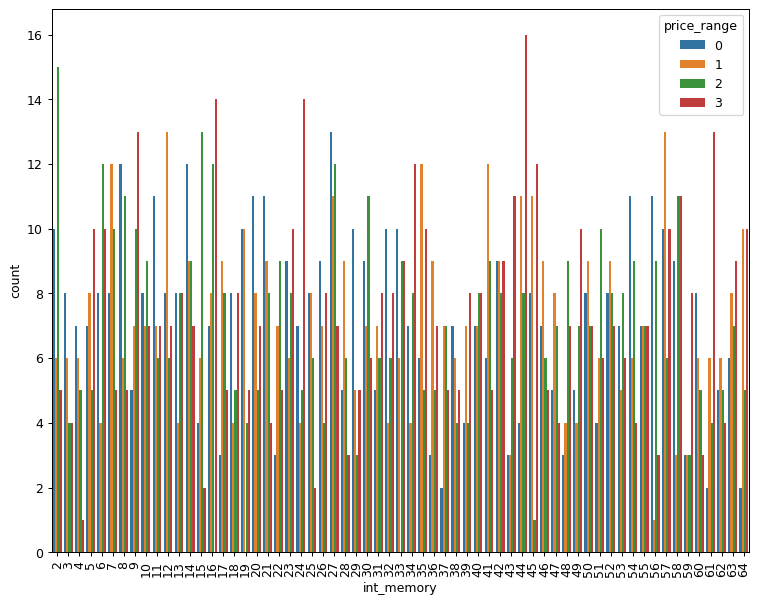

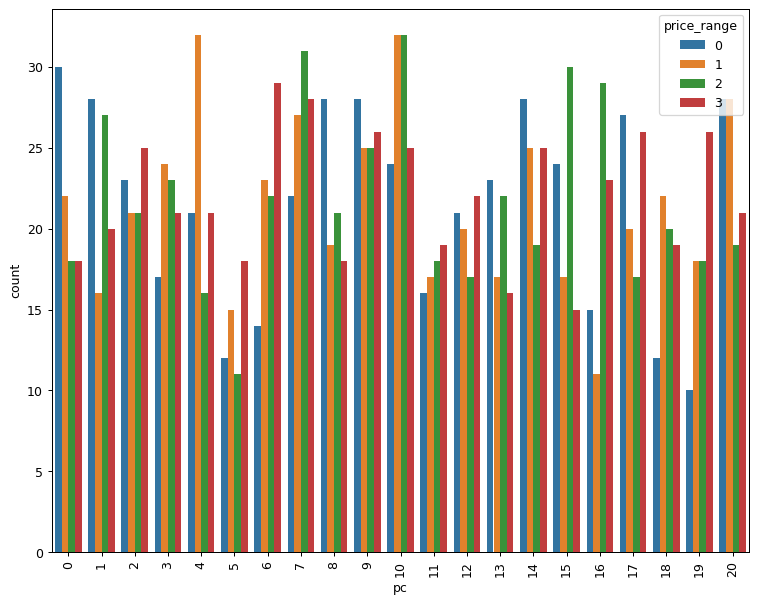

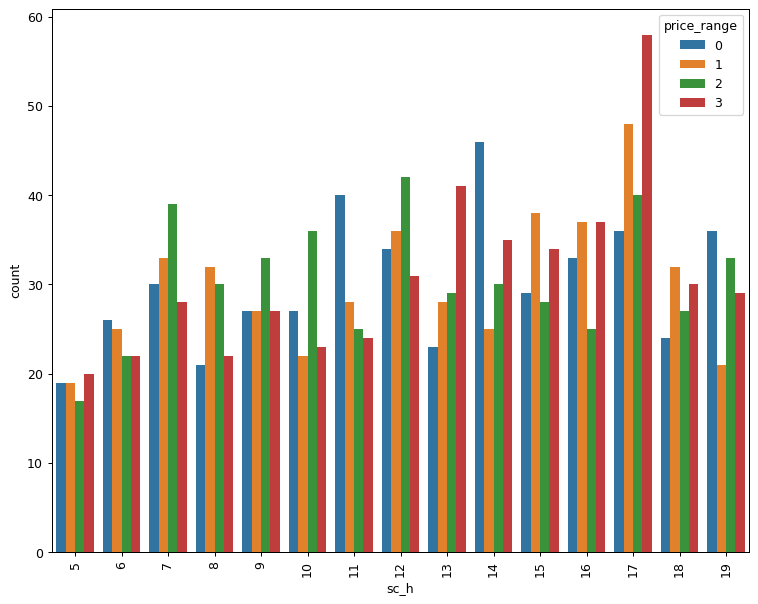

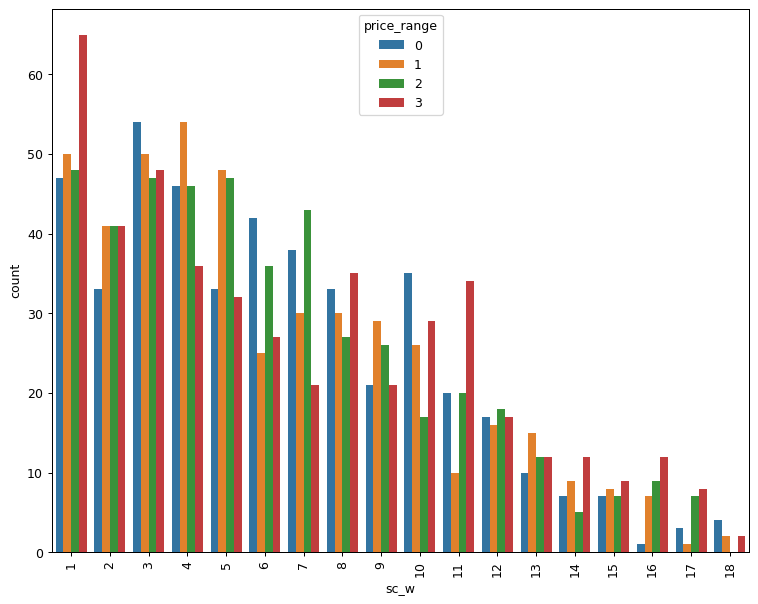

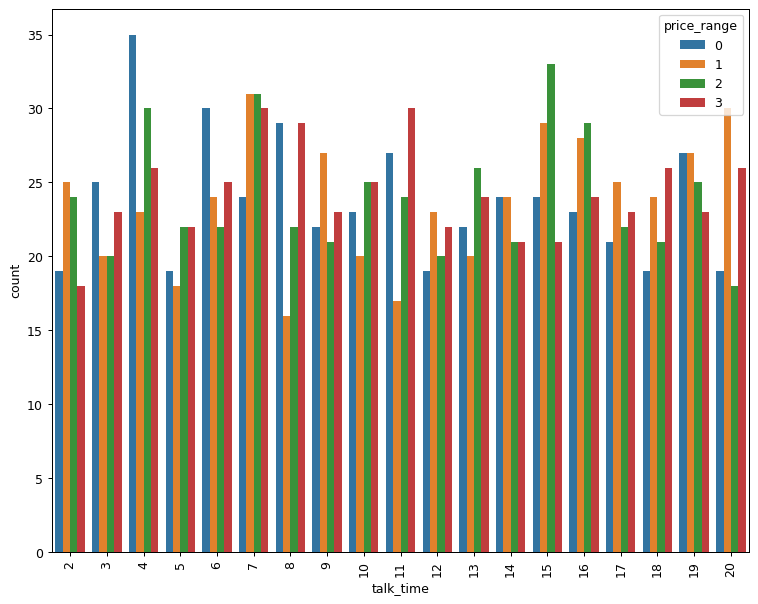

In [114]:
names = ['clock_speed','fc','int_memory','pc','sc_h','sc_w','talk_time']

for i in names :
    plt.figure(figsize=(10,8), dpi=90)
    ax = sns.countplot(x=i, data=df, hue= "price_range")
    plt.xticks(rotation=90)

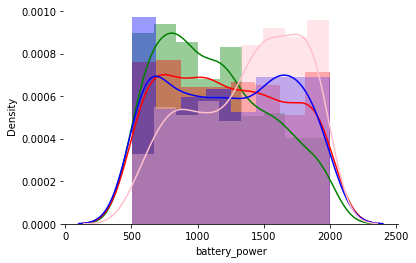

In [119]:
sns.distplot( df[df['price_range'] == 0]['battery_power'], color = 'green')
sns.distplot( df[df['price_range'] == 1]['battery_power'], color = 'red')
sns.distplot( df[df['price_range'] == 2]['battery_power'], color = 'blue')
sns.distplot( df[df['price_range'] == 3]['battery_power'], color = 'pink')
sns.despine(top=True,right=True,left=True)

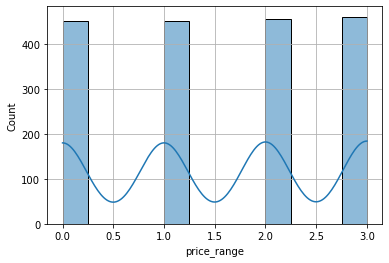

In [118]:
sns.histplot(df["price_range"], kde=True)
plt.grid()

# 3. Correlation

<AxesSubplot:>

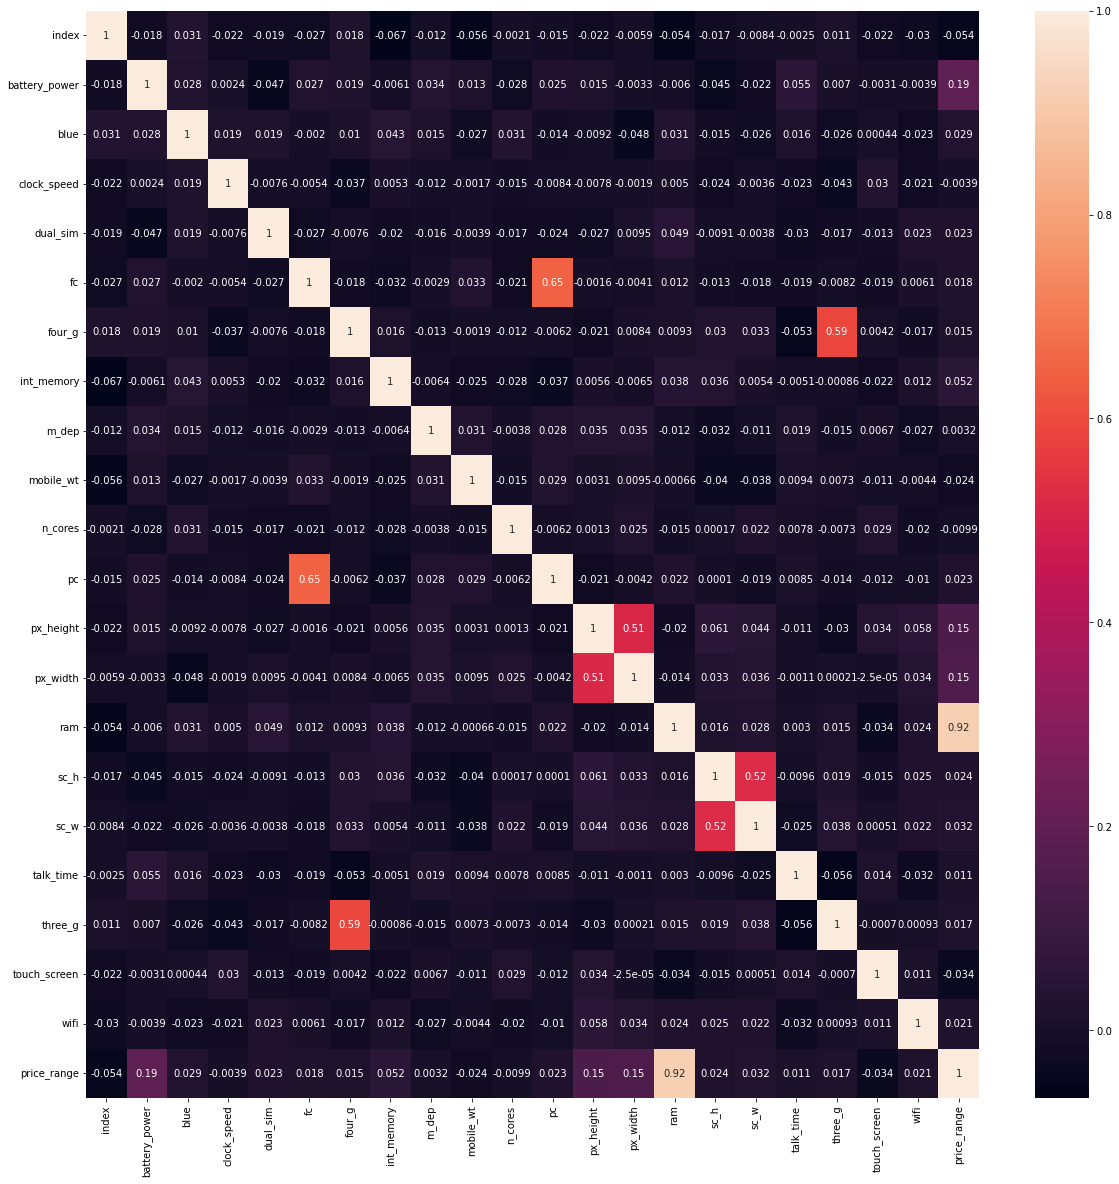

In [19]:
cor = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True)

# 

# 4. Machine Learning Model

# 

### I am going to use 3 different algorithms on this dataset. 

1. Decision Tree(DTs)

2. Random Forest(RF)

3. Support Vector Machine(SVM)

# 

# 4-1. Decision Tree(DTs)

A Decision Tree algorithm is one of the most popular machine learning algorithms. It is a supervised learning algorithm which can be used for both Calssification and Regression datasets.
Decision tree includes 3 parts such as a root node, branches, and leaf nodes. Also there could be internal node which are attributes.

### Methods for solution : 

- ID3 : 

what is Entropy ?


Entropy measures the amount of uncertainty in the given dataset.       Entropy cotrols how a DT decides to split the data. It actually affects how a Decision Tree draws its boundaries.


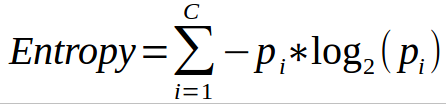

- Gini (CART) : 
    
    Gini index uses the Gini method to create split points.

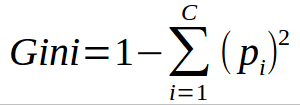

# 

## Creating  Model DT

In [18]:
x =  pd.DataFrame(df, columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])

y = df["price_range"].values.reshape(-1,1)

In [19]:
x_train , x_test, y_train, y_test = train_test_split(x,y, random_state=1, test_size=0.3)

In [20]:
clf_dt = DecisionTreeClassifier(max_depth = 3)
clf_dt.fit(x_train, y_train)
y_pred_dt = clf_dt.predict(x_test)

In [21]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred_dt))

Accuracy :  0.7316666666666667


## Evaluation loops

In [22]:
depth_range = range(3, 21)


for depth in depth_range:
    accuracy = []
    clf_dt = DecisionTreeClassifier(max_depth = depth)
    
    clf_dt = clf_dt.fit(x_train,y_train)
    y_pred_dt = clf_dt.predict(x_test)
    Acc1 = print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
    accuracy.append(Acc1)

Accuracy: 0.7316666666666667

Accuracy: 0.7683333333333333

Accuracy: 0.8166666666666667

Accuracy: 0.8316666666666667

Accuracy: 0.8316666666666667

Accuracy: 0.84

Accuracy: 0.8316666666666667

Accuracy: 0.8266666666666667

Accuracy: 0.8166666666666667

Accuracy: 0.825

Accuracy: 0.8283333333333334

Accuracy: 0.8383333333333334

Accuracy: 0.84

Accuracy: 0.8233333333333334

Accuracy: 0.825

Accuracy: 0.8366666666666667

Accuracy: 0.8233333333333334

Accuracy: 0.8333333333333334


In [100]:
max_depth = range(3,21)
criterion = ['entropy', 'gini']
random_state =range(1,8)

parameters = {'max_depth': max_depth , 'criterion':criterion , 'random_state':random_state}

gridsearch = GridSearchCV(estimator = clf_dt,
                         param_grid = parameters,
                         scoring = 'accuracy',
                         cv = 5,
                         verbose = 1,
                         n_jobs = -1)
gridsearch.fit(x_train,y_train)
print('best score or decision tree:',gridsearch.best_score_)
print('best parameters:',gridsearch.best_params_)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits

best score or decision tree: 0.8511648745519713

best parameters: {'criterion': 'gini', 'max_depth': 7, 'random_state': 4}


In [23]:
def DTs_best(x, y, test_size, max_depth) :
    evaluated_df = pd.DataFrame()
    for xx in test_size :
        x_train , x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=xx)
        for m_depth in max_depth :
            clf = DecisionTreeClassifier(max_depth=m_depth)
            clf.fit(x_train, y_train)
            y_pred = clf.predict(x_test)
            dict = {"Test_size":xx, "Max_depth":m_depth, "Accuracy":metrics.accuracy_score(y_test, y_pred), "Score":clf.score(x_test,y_test)}
            evaluated_df = evaluated_df.append(dict, ignore_index=True)
    return(evaluated_df)

def highlight_max(score):
    max_score = score == score.max()
    return ["background-color : yellow "  if v else ''  for v in max_score]

In [24]:
evaluated_df = DTs_best(x,y,[.1,.15,.2,.25,.3], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
evaluated_df.style.apply(highlight_max)

,Test_size,Max_depth,Accuracy,Score
0,0.100000,1.000000,0.550000,0.550000
1,0.100000,2.000000,0.735000,0.735000
2,0.100000,3.000000,0.740000,0.740000
3,0.100000,4.000000,0.770000,0.770000
4,0.100000,5.000000,0.815000,0.815000
5,0.100000,6.000000,0.825000,0.825000
6,0.100000,7.000000,0.825000,0.825000
7,0.100000,8.000000,0.850000,0.850000
8,0.100000,9.000000,0.850000,0.850000
9,0.100000,10.000000,0.840000,0.840000


## 2 DTs models

### using entropy as criterion

In [33]:
x_train , x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.2)

In [34]:
clf_dt_entropy = DecisionTreeClassifier(max_depth=7,criterion="entropy",random_state =4)

clf_dt_entropy = clf_dt_entropy.fit(x_train,y_train)
y_pred_dt = clf_dt_entropy.predict(x_test)
Acc1_dt = print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
Acc1_dt

entropy_dt_f1 =  metrics.f1_score(y_test, y_pred_dt,average="macro")
print('f1 score for each class is (using entropy):', metrics.f1_score(y_test, y_pred_dt,average=None))
print('f1 score is (using entropy):', entropy_dt_f1)

Accuracy: 0.88

f1 score for each class is (using entropy): [0.92753623 0.86170213 0.84057971 0.88888889]

f1 score is (using entropy): 0.8796767396443622


In [35]:
print('classification_report:\n\n',classification_report(y_test,y_pred_dt))

classification_report:



               precision    recall  f1-score   support



           0       0.93      0.92      0.93       104

           1       0.81      0.92      0.86        88

           2       0.88      0.81      0.84       108

           3       0.90      0.88      0.89       100



    accuracy                           0.88       400

   macro avg       0.88      0.88      0.88       400

weighted avg       0.88      0.88      0.88       400




# 

### Confusion Matrix


True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

# 

Text(0.5, 1.0, 'clf_DT ConfusionMatrix')

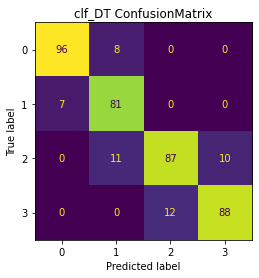

In [36]:
metrics.ConfusionMatrixDisplay.from_estimator(clf_dt_entropy, x_test, y_test , colorbar=False)
plt.grid(False);
plt.title("clf_DT ConfusionMatrix")

# 

### using gini as criterion

In [38]:
x_train , x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.2)

In [39]:
clf_dt = DecisionTreeClassifier(max_depth=7,criterion="gini",random_state =4)

clf_dt = clf_dt.fit(x_train,y_train)
y_pred_dt = clf_dt.predict(x_test)
Acc1_dt = print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
Acc1_dt

gini_dt_f1 = metrics.f1_score(y_test, y_pred_dt,average="macro")
print('f1 score for each class is (using gini):', metrics.f1_score(y_test, y_pred_dt,average=None))
print('f1 score is (using gini):', gini_dt_f1 )

Accuracy: 0.8675

f1 score for each class is (using gini): [0.94581281 0.84916201 0.8125     0.86597938]

f1 score is (using gini): 0.8683635501245642


In [40]:
print('classification_report:\n\n',classification_report(y_test,y_pred_dt))

classification_report:



               precision    recall  f1-score   support



           0       0.97      0.92      0.95       104

           1       0.84      0.86      0.85        88

           2       0.78      0.84      0.81       108

           3       0.89      0.84      0.87       100



    accuracy                           0.87       400

   macro avg       0.87      0.87      0.87       400

weighted avg       0.87      0.87      0.87       400




Text(0.5, 1.0, 'clf_DT ConfusionMatrix')

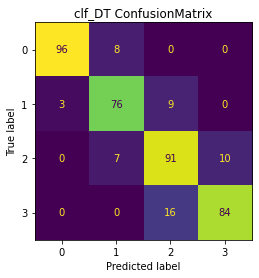

In [41]:
metrics.ConfusionMatrixDisplay.from_estimator(clf_dt, x_test, y_test , colorbar=False)
plt.grid(False);
plt.title("clf_DT ConfusionMatrix")

# 

# 

# Let's see the prediction using Decision Tree

In [43]:
x_train = finall_df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']][:1998]


y_train = finall_df[["price_range"]][:1998].values.reshape(-1,1)

In [44]:
x_test = finall_df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']][1998:]
x_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,8,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,8,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,8,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,8,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,8,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [45]:
clf_dt.fit(x_train, y_train)
DT_finall_y_pred = clf_dt.predict(x_test)
DT_finall_y_pred

array([3., 3., 2., 3., 1., 3., 3., 1., 3., 0., 3., 3., 0., 0., 2., 1., 2.,
       0., 3., 2., 0., 2., 1., 1., 3., 0., 2., 0., 3., 0., 2., 0., 3., 0.,
       0., 1., 3., 1., 2., 1., 1., 2., 0., 0., 0., 1., 0., 3., 1., 2., 1.,
       0., 3., 0., 3., 1., 3., 1., 1., 3., 3., 2., 0., 1., 1., 1., 1., 2.,
       1., 2., 1., 2., 2., 3., 3., 0., 2., 1., 2., 3., 1., 3., 3., 0., 3.,
       0., 3., 1., 2., 0., 1., 2., 2., 0., 2., 1., 0., 2., 1., 3., 1., 0.,
       0., 3., 1., 2., 0., 1., 2., 3., 3., 2., 1., 3., 3., 3., 3., 1., 3.,
       0., 0., 3., 2., 1., 2., 0., 3., 3., 2., 1., 0., 2., 1., 1., 3., 0.,
       1., 0., 3., 2., 1., 3., 1., 3., 2., 3., 3., 2., 2., 3., 2., 3., 1.,
       0., 3., 2., 3., 3., 3., 3., 3., 2., 3., 2., 3., 3., 1., 0., 3., 0.,
       0., 0., 2., 0., 0., 1., 1., 0., 1., 2., 0., 0., 0., 1., 2., 2., 2.,
       1., 0., 0., 0., 0., 0., 3., 1., 1., 2., 2., 2., 3., 1., 2., 3., 3.,
       3., 2., 2., 1., 0., 0., 1., 2., 0., 2., 3., 3., 1., 2., 0., 3., 2.,
       2., 3., 0., 0., 1.

In [46]:
df_test_DT = pd.DataFrame(df_test)

df_test_DT['predicted_price'] = DT_finall_y_pred
df_test_DT

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predicted_price
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,8,2,0,1,0,3.0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,8,7,1,0,0,3.0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2.0
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,8,7,1,1,0,3.0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,2.0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,8,19,0,1,1,1.0
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,8,14,1,0,0,1.0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,2.0


#       

# 

# 

# 4-2. Random Forest(RF)

Random forest is a supervised learning algorithm. This algorithm is also used for both Classification and Regression problems. It creates decision trees on the dataset and after voting, it chooses the best one of them.

# 

In [47]:
x =  pd.DataFrame(df, columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])

y = df["price_range"].values.reshape(-1,1)

In [48]:
x_train , x_test, y_train, y_test = train_test_split(x,y, random_state=1, test_size=0.2)

In [49]:
clf_rf = RandomForestClassifier(max_depth=3)
clf_rf = clf_rf.fit(x_train, y_train)
y_pred_rf = clf_rf.predict(x_test)

In [50]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred_rf))

Accuracy :  0.815


## Choosing hyperparameters

In [64]:
def RF_best(x, y, test_size, max_depth, n_estimators) :
    evaluated_df = pd.DataFrame()
    for xx in test_size :
        x_train , x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=xx)
        for m_depth in max_depth :
            for  n_estim in n_estimators :
                clf = RandomForestClassifier(max_depth=m_depth, n_estimators=n_estim)
                clf.fit(x_train, y_train)
                y_pred = clf.predict(x_test)
                dict = {"Test_size":xx, "Max_depth":m_depth, "n_estimator":n_estim ,"Accuracy":metrics.accuracy_score(y_test, y_pred), "Score":clf.score(x_test,y_test)}
                evaluated_df = evaluated_df.append(dict, ignore_index=True)
    return(evaluated_df)

def highlight_max(score):
    max_score = score == score.max()
    return ["background-color : yellow "  if v else ''  for v in max_score]

In [60]:
evaluated_df = RF_best(x,y,[.1,.15,.2,.25,.3], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],[100,200])
evaluated_df.style.apply(highlight_max)

,Test_size,Max_depth,n_estimator,Accuracy,Score
0,0.100000,1.000000,100.000000,0.640000,0.640000
1,0.100000,1.000000,200.000000,0.665000,0.665000
2,0.100000,2.000000,100.000000,0.795000,0.795000
3,0.100000,2.000000,200.000000,0.820000,0.820000
4,0.100000,3.000000,100.000000,0.830000,0.830000
5,0.100000,3.000000,200.000000,0.830000,0.830000
6,0.100000,4.000000,100.000000,0.825000,0.825000
7,0.100000,4.000000,200.000000,0.850000,0.850000
8,0.100000,5.000000,100.000000,0.855000,0.855000
9,0.100000,5.000000,200.000000,0.850000,0.850000


# 

# 

### 2 Random Froest models

### First one : using gini

In [66]:
x_train , x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.15)

clf_rf_gini = RandomForestClassifier(max_depth=18, criterion="gini", n_estimators=200,random_state =4)

clf_rf_gini = clf_rf_gini.fit(x_train,y_train)
y_pred_rf_rf = clf_rf_gini.predict(x_test)
Acc1_rf = print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
Acc1_rf

entropy_f1 =  metrics.f1_score(y_test, y_pred_rf,average="macro")
print('f1 score for each class is (using gini):', metrics.f1_score(y_test, y_pred_rf,average=None))
print('f1 score is (using gini):', entropy_f1)

Accuracy: 0.9233333333333333

f1 score for each class is (using gini): [0.96511628 0.87301587 0.88590604 0.95424837]

f1 score is (using gini): 0.9195716395917922


Text(0.5, 1.0, 'clf_RF(using gini) ConfusionMatrix')

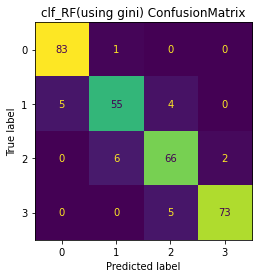

In [67]:
metrics.ConfusionMatrixDisplay.from_estimator(clf_rf_gini, x_test, y_test , colorbar=False)
plt.grid(False);
plt.title("clf_RF(using gini) ConfusionMatrix")

### Second one : using entropy

In [68]:
x_train , x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.15)

clf_rf_entropy = RandomForestClassifier(max_depth=18, criterion="entropy", n_estimators=200,random_state =4)

clf_rf_entropy = clf_rf_entropy.fit(x_train,y_train)
y_pred_rf = clf_rf_entropy.predict(x_test)
Acc1_rf = print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
Acc1_rf

entropy_f1 =  metrics.f1_score(y_test, y_pred_rf,average="macro")
print('f1 score for each class is (using entropy):', metrics.f1_score(y_test, y_pred_rf,average=None))
print('f1 score is (using entropy):', entropy_f1)

Accuracy: 0.9166666666666666

f1 score for each class is (using entropy): [0.97647059 0.88372093 0.8590604  0.93421053]

f1 score is (using entropy): 0.9133656118670513


Text(0.5, 1.0, 'clf_RF(using entropy) ConfusionMatrix')

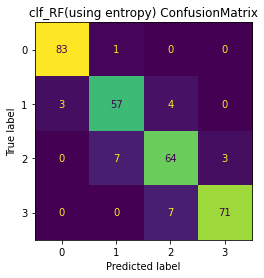

In [69]:
metrics.ConfusionMatrixDisplay.from_estimator(clf_rf_entropy, x_test, y_test , colorbar=False)
plt.grid(False);
plt.title("clf_RF(using entropy) ConfusionMatrix")

# 

# 

## As we could guess RandomForest(92%) has higher score than DecisionTree. 

# 

# Let's see the prediction using Random Forest

In [71]:
x_train = finall_df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']][:1998]


y_train = finall_df[["price_range"]][:1998].values.reshape(-1,1)

In [72]:
x_test = finall_df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']][1998:]
x_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,8,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,8,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,8,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,8,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,8,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [73]:
clf_rf_gini.fit(x_train, y_train)
RF_finall_y_pred = clf_rf_gini.predict(x_test)
RF_finall_y_pred

array([3., 3., 2., 3., 1., 3., 3., 1., 3., 0., 3., 3., 0., 0., 2., 0., 2.,
       1., 3., 2., 1., 3., 1., 1., 3., 0., 2., 0., 2., 0., 2., 0., 3., 0.,
       0., 1., 3., 1., 2., 1., 1., 2., 0., 0., 0., 1., 0., 3., 1., 2., 1.,
       0., 3., 0., 3., 1., 3., 1., 1., 3., 3., 2., 0., 1., 1., 1., 1., 2.,
       1., 1., 1., 2., 2., 3., 3., 0., 2., 0., 2., 3., 0., 3., 3., 0., 3.,
       0., 3., 1., 3., 0., 1., 1., 2., 0., 2., 1., 0., 2., 1., 2., 1., 0.,
       0., 3., 1., 2., 0., 1., 2., 3., 3., 3., 1., 3., 3., 3., 3., 1., 3.,
       0., 0., 3., 2., 1., 1., 0., 3., 2., 3., 1., 0., 2., 1., 1., 3., 1.,
       1., 0., 3., 2., 1., 3., 1., 2., 2., 3., 3., 2., 2., 3., 2., 3., 0.,
       0., 3., 2., 3., 3., 3., 3., 2., 2., 3., 3., 3., 3., 1., 0., 3., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 2., 1., 0., 0., 1., 2., 2., 2.,
       1., 0., 0., 0., 1., 0., 3., 1., 0., 2., 2., 2., 3., 1., 2., 3., 3.,
       3., 1., 2., 1., 0., 0., 1., 3., 0., 3., 3., 3., 0., 2., 0., 3., 2.,
       3., 3., 0., 0., 1.

In [74]:
df_test_RF = pd.DataFrame(df_test)

df_test_RF['predicted_price'] = RF_finall_y_pred
df_test_RF

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predicted_price
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,8,2,0,1,0,3.0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,8,7,1,0,0,3.0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2.0
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,8,7,1,1,0,3.0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,2.0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,8,19,0,1,1,1.0
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,8,14,1,0,0,0.0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,2.0


# 

# 

# 

# 4-3.Support Vector Machine (SVM)

In [75]:
x =  pd.DataFrame(df, columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])

y = df["price_range"].values.reshape(-1,1)

In [76]:
x_train , x_test, y_train, y_test = train_test_split(x,y, random_state=1, test_size=0.3)

##  C-Support Vector Classification(SVC)

In [91]:
def SVC_best(x, y, test_size, C) :
    evaluated_df = pd.DataFrame()
    for xx in test_size :
        x_train , x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=xx) 
        for c in C :
            clf = SVC(C=c)
            clf.fit(x_train, y_train)
            y_pred = clf.predict(x_test)
            dict = {"Test_size":xx, "C":c, "Accuracy":metrics.accuracy_score(y_test, y_pred), "Score":clf.score(x_test,y_test)}
            evaluated_df = evaluated_df.append(dict, ignore_index=True)
    return(evaluated_df)

def highlight_max(score):
    max_score = score == score.max()
    return ["background-color : yellow "  if v else ''  for v in max_score]

In [92]:
c = range(1,11)
evaluated_df = SVC_best(x,y,[.1,.15,.2,.25,.3],c)
evaluated_df.style.apply(highlight_max)

,Test_size,C,Accuracy,Score
0,0.100000,1.000000,0.950000,0.950000
1,0.100000,2.000000,0.950000,0.950000
2,0.100000,3.000000,0.950000,0.950000
3,0.100000,4.000000,0.950000,0.950000
4,0.100000,5.000000,0.950000,0.950000
5,0.100000,6.000000,0.940000,0.940000
6,0.100000,7.000000,0.940000,0.940000
7,0.100000,8.000000,0.945000,0.945000
8,0.100000,9.000000,0.945000,0.945000
9,0.100000,10.000000,0.945000,0.945000


# 

### kernel type : poly

In [93]:
x_train , x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.2)

clf_svc = SVC(kernel='poly',C=3)

clf_svc = clf_svc.fit(x_train,y_train)
y_pred_svc = clf_svc.predict(x_test)
Acc1_svc = print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svc))
Acc1_svc

SVC_f1 =  metrics.f1_score(y_test, y_pred_svc,average="macro")
print('f1 score for each class is (using SVC):', metrics.f1_score(y_test, y_pred_svc,average=None))
print('f1 score is (using SVC):', SVC_f1)

Accuracy: 0.9625

f1 score for each class is (using SVC): [0.98095238 0.96590909 0.94835681 0.95522388]

f1 score is (using SVC): 0.962610539992556


In [94]:
print('classification_report:\n\n',classification_report(y_test,y_pred_svc))

classification_report:



               precision    recall  f1-score   support



           0       0.97      0.99      0.98       104

           1       0.97      0.97      0.97        88

           2       0.96      0.94      0.95       108

           3       0.95      0.96      0.96       100



    accuracy                           0.96       400

   macro avg       0.96      0.96      0.96       400

weighted avg       0.96      0.96      0.96       400




### kernel type : rbf

In [97]:
x_train , x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.2)

clf_svc = SVC(kernel='rbf',C=3)

clf_svc = clf_svc.fit(x_train,y_train)
y_pred_svc = clf_svc.predict(x_test)
Acc1_svc = print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svc))
Acc1_svc

SVC_f1 =  metrics.f1_score(y_test, y_pred_svc,average="macro")
print('f1 score for each class is (using SVC):', metrics.f1_score(y_test, y_pred_svc,average=None))
print('f1 score is (using SVC):', SVC_f1)

Accuracy: 0.965

f1 score for each class is (using SVC): [0.98095238 0.96590909 0.95327103 0.96      ]

f1 score is (using SVC): 0.9650331249747137


In [98]:
print('classification_report:\n\n',classification_report(y_test,y_pred_svc))

classification_report:



               precision    recall  f1-score   support



           0       0.97      0.99      0.98       104

           1       0.97      0.97      0.97        88

           2       0.96      0.94      0.95       108

           3       0.96      0.96      0.96       100



    accuracy                           0.96       400

   macro avg       0.96      0.97      0.97       400

weighted avg       0.96      0.96      0.96       400




### kernel type : sigmoid

In [99]:
x_train , x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.2)

clf_svc = SVC(kernel='sigmoid',C=3)

clf_svc = clf_svc.fit(x_train,y_train)
y_pred_svc = clf_svc.predict(x_test)
Acc1_svc = print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svc))
Acc1_svc

SVC_f1 =  metrics.f1_score(y_test, y_pred_svc,average="macro")
print('f1 score for each class is (using SVC):', metrics.f1_score(y_test, y_pred_svc,average=None))
print('f1 score is (using SVC):', SVC_f1)

Accuracy: 0.205

f1 score for each class is (using SVC): [0.62439024 0.08       0.         0.07051282]

f1 score is (using SVC): 0.19372576610381484


In [100]:
print('classification_report:\n\n',classification_report(y_test,y_pred_svc))

classification_report:



               precision    recall  f1-score   support



           0       0.63      0.62      0.62       104

           1       0.08      0.08      0.08        88

           2       0.00      0.00      0.00       108

           3       0.05      0.11      0.07       100



    accuracy                           0.20       400

   macro avg       0.19      0.20      0.19       400

weighted avg       0.20      0.20      0.20       400




### kernel type : linear

In [102]:
x_train , x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.2)

clf_svc = SVC(kernel='linear',C=3)

clf_svc = clf_svc.fit(x_train,y_train)
y_pred_svc = clf_svc.predict(x_test)
Acc1_svc = print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svc))
Acc1_svc

SVC_f1 =  metrics.f1_score(y_test, y_pred_svc,average="macro")
print('f1 score for each class is (using SVC):', metrics.f1_score(y_test, y_pred_svc,average=None))
print('f1 score is (using SVC):', SVC_f1)

Accuracy: 0.9725

f1 score for each class is (using SVC): [0.97607656 0.96045198 0.97169811 0.98019802]

f1 score is (using SVC): 0.9721061663586452


In [103]:
print('classification_report:\n\n',classification_report(y_test,y_pred_svc))

classification_report:



               precision    recall  f1-score   support



           0       0.97      0.98      0.98       104

           1       0.96      0.97      0.96        88

           2       0.99      0.95      0.97       108

           3       0.97      0.99      0.98       100



    accuracy                           0.97       400

   macro avg       0.97      0.97      0.97       400

weighted avg       0.97      0.97      0.97       400




## SVC with liniear kernel has the highiest score.

Text(0.5, 1.0, 'clf_SVC(using linear as kernel) ConfusionMatrix')

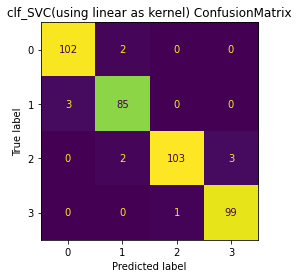

In [104]:
metrics.ConfusionMatrixDisplay.from_estimator(clf_svc, x_test, y_test , colorbar=False)
plt.grid(False);
plt.title("clf_SVC(using linear as kernel) ConfusionMatrix")

# 

# Let's see the prediction using SVM

In [105]:
finall_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,8,19,0,0,1,1.0,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,8,7,1,1,0,2.0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,8,9,1,1,0,2.0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,8,15,1,1,0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,913,2121,14,8,15,1,1,0,NaN,996.0
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1632,1933,8,8,19,0,1,1,NaN,997.0
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,825,1223,5,8,14,1,0,0,NaN,998.0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,832,2509,15,11,6,0,1,0,NaN,999.0


In [106]:
x_train = finall_df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']][:1998]


y_train = finall_df[["price_range"]][:1998].values.reshape(-1,1)

In [107]:
x_test = finall_df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']][1998:]
x_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,8,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,8,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,8,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,8,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,8,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [109]:
clf_svc.fit(x_train, y_train)
svc_finall_y_pred = clf_svc.predict(x_test)
svc_finall_y_pred

array([3., 3., 2., 3., 1., 3., 3., 1., 3., 0., 3., 3., 0., 0., 2., 0., 2.,
       1., 3., 2., 1., 3., 1., 1., 3., 0., 2., 0., 3., 0., 2., 0., 3., 0.,
       0., 1., 3., 1., 2., 1., 1., 2., 0., 0., 0., 1., 0., 3., 1., 2., 1.,
       0., 3., 0., 3., 1., 3., 1., 1., 3., 3., 3., 0., 1., 1., 1., 2., 3.,
       1., 2., 1., 2., 2., 3., 3., 0., 2., 0., 1., 3., 0., 3., 3., 0., 3.,
       0., 3., 1., 3., 0., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 0.,
       0., 3., 0., 2., 0., 1., 2., 3., 3., 3., 1., 3., 3., 3., 3., 2., 3.,
       0., 0., 3., 2., 1., 2., 0., 3., 2., 3., 2., 0., 2., 2., 1., 3., 1.,
       1., 0., 3., 2., 1., 2., 1., 3., 2., 3., 3., 3., 2., 3., 2., 3., 1.,
       0., 3., 2., 3., 3., 3., 3., 2., 2., 3., 3., 3., 3., 1., 0., 3., 0.,
       0., 0., 2., 1., 0., 1., 0., 0., 1., 2., 1., 0., 0., 1., 1., 2., 2.,
       1., 0., 0., 0., 1., 0., 3., 1., 0., 2., 2., 3., 3., 1., 1., 2., 2.,
       3., 2., 2., 1., 1., 0., 1., 2., 0., 2., 3., 3., 0., 2., 0., 3., 2.,
       3., 3., 1., 0., 1.

In [110]:
df_test_svc = pd.DataFrame(df_test)

df_test_svc['predicted_price'] = svc_finall_y_pred
df_test_svc

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predicted_price
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,8,2,0,1,0,3.0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,8,7,1,0,0,3.0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2.0
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,8,7,1,1,0,3.0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,2.0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,8,19,0,1,1,1.0
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,8,14,1,0,0,0.0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,2.0


# 

# 

# 

# Conclusion

### clf_SVC has the highest score of all these 3 algorithms.

## Finall Answer would be :

In [111]:
df_test_svc

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predicted_price
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,8,2,0,1,0,3.0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,8,7,1,0,0,3.0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2.0
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,8,7,1,1,0,3.0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,2.0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,8,19,0,1,1,1.0
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,8,14,1,0,0,0.0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,2.0
